In [3]:

#Loading all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder,minmax_scale,PolynomialFeatures,StandardScaler,Normalizer
from sklearn.model_selection import KFold,GridSearchCV,train_test_split
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
#from sklearn.model_selection import train_test_split
%matplotlib inline
import datetime
from datetime import date, timedelta
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import keras
import sys
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
import lightgbm as lgb

ModuleNotFoundError: No module named 'seaborn'

In [4]:
data = pd.read_csv("demand_dataset.zip",sep = ';', header=0)

In [5]:
data_test=data[(data["material"] == "D13397959") | (data["material"] == "D13384914") | (data["material"] == "D13398000")]

In [7]:
data.head()

,material,plant_code,cases,value,sales_date,f_day,adbno,product_description,service_level,mrp_desc,group2_desc,group3_desc,group6_desc,est_lead_time,sku_class,IS_HOL,day,month,year,log_cases
0,D13384914,AC01,1,74.84,2017-01-04,198,4,TY120SWHXL002500,0.92,Coveralls,TYVEK PROTECTION,TYVEK PROTECTION,Finished Goods,16,AX,0,Mittwoch,1,2017,0.000000
1,D13384914,AC01,2,149.68,2017-01-05,198,4,TY120SWHXL002500,0.92,Coveralls,TYVEK PROTECTION,TYVEK PROTECTION,Finished Goods,16,AX,0,Donnerstag,1,2017,0.693147
2,D13384914,AC01,24,1803.06,2017-01-10,198,4,TY120SWHXL002500,0.92,Coveralls,TYVEK PROTECTION,TYVEK PROTECTION,Finished Goods,16,AX,0,Dienstag,1,2017,3.178054
3,D13384914,AC01,9,717.75,2017-01-11,198,4,TY120SWHXL002500,0.92,Coveralls,TYVEK PROTECTION,TYVEK PROTECTION,Finished Goods,16,AX,0,Mittwoch,1,2017,2.197225
4,D13384914,AC01,8,659.76,2017-01-12,198,4,TY120SWHXL002500,0.92,Coveralls,TYVEK PROTECTION,TYVEK PROTECTION,Finished Goods,16,AX,0,Donnerstag,1,2017,2.079442


In [8]:
data.shape

(191860, 20)

In [9]:
data.describe()

,cases,value,f_day,adbno,service_level,est_lead_time,IS_HOL,month,year,log_cases
count,191860.000000,191860.000000,191860.000000,191860.000000,191860.000000,191860.000000,191860.000000,191860.000000,191860.000000,191860.000000
mean,125.661555,2644.521517,263.547243,6.600261,0.947617,61.360862,0.030548,6.195856,2017.627265,2.604941
std,1011.767792,8129.905428,157.712907,13.025606,0.008592,20.081418,0.172091,3.593154,0.632900,1.846151
min,1.000000,-42538.120000,2.000000,1.000000,0.850000,16.000000,0.000000,1.000000,2016.000000,0.000000
25%,3.000000,272.820000,134.000000,2.000000,0.950000,66.000000,0.000000,3.000000,2017.000000,1.098612
50%,10.000000,695.440000,240.000000,3.000000,0.950000,69.000000,0.000000,6.000000,2018.000000,2.302585
75%,42.000000,1913.135000,392.000000,6.000000,0.950000,71.000000,0.000000,9.000000,2018.000000,3.737670
max,152310.000000,456422.500000,562.000000,632.000000,0.990000,120.000000,1.000000,12.000000,2019.000000,11.933670


In [10]:
data.material.describe()

count        191860
unique         1481
top       D13398112
freq           1109
Name: material, dtype: object

In [11]:
data.sku_class.describe()

count     191860
unique        11
top           AX
freq       65170
Name: sku_class, dtype: object

In [14]:
data.sku_class.value_counts()

AX              65170
BY              24663
BX              24352
AY              23315
AZ              15633
CY              14538
BZ              11990
CZ               7328
CX               4724
Discontinued       97
Out of scope       50
Name: sku_class, dtype: int64

In [15]:
data[data.sku_class == 'AX'].head()

,material,plant_code,cases,value,sales_date,f_day,adbno,product_description,service_level,mrp_desc,group2_desc,group3_desc,group6_desc,est_lead_time,sku_class,IS_HOL,day,month,year,log_cases
0,D13384914,AC01,1,74.84,2017-01-04,198,4,TY120SWHXL002500,0.92,Coveralls,TYVEK PROTECTION,TYVEK PROTECTION,Finished Goods,16,AX,0,Mittwoch,1,2017,0.000000
1,D13384914,AC01,2,149.68,2017-01-05,198,4,TY120SWHXL002500,0.92,Coveralls,TYVEK PROTECTION,TYVEK PROTECTION,Finished Goods,16,AX,0,Donnerstag,1,2017,0.693147
2,D13384914,AC01,24,1803.06,2017-01-10,198,4,TY120SWHXL002500,0.92,Coveralls,TYVEK PROTECTION,TYVEK PROTECTION,Finished Goods,16,AX,0,Dienstag,1,2017,3.178054
3,D13384914,AC01,9,717.75,2017-01-11,198,4,TY120SWHXL002500,0.92,Coveralls,TYVEK PROTECTION,TYVEK PROTECTION,Finished Goods,16,AX,0,Mittwoch,1,2017,2.197225
4,D13384914,AC01,8,659.76,2017-01-12,198,4,TY120SWHXL002500,0.92,Coveralls,TYVEK PROTECTION,TYVEK PROTECTION,Finished Goods,16,AX,0,Donnerstag,1,2017,2.079442


In [5]:
cols = data.columns

In [22]:
cx_data = data[(data.sku_class == 'CX') & (data.year == 2019)].sort_values(by = 'sales_date')

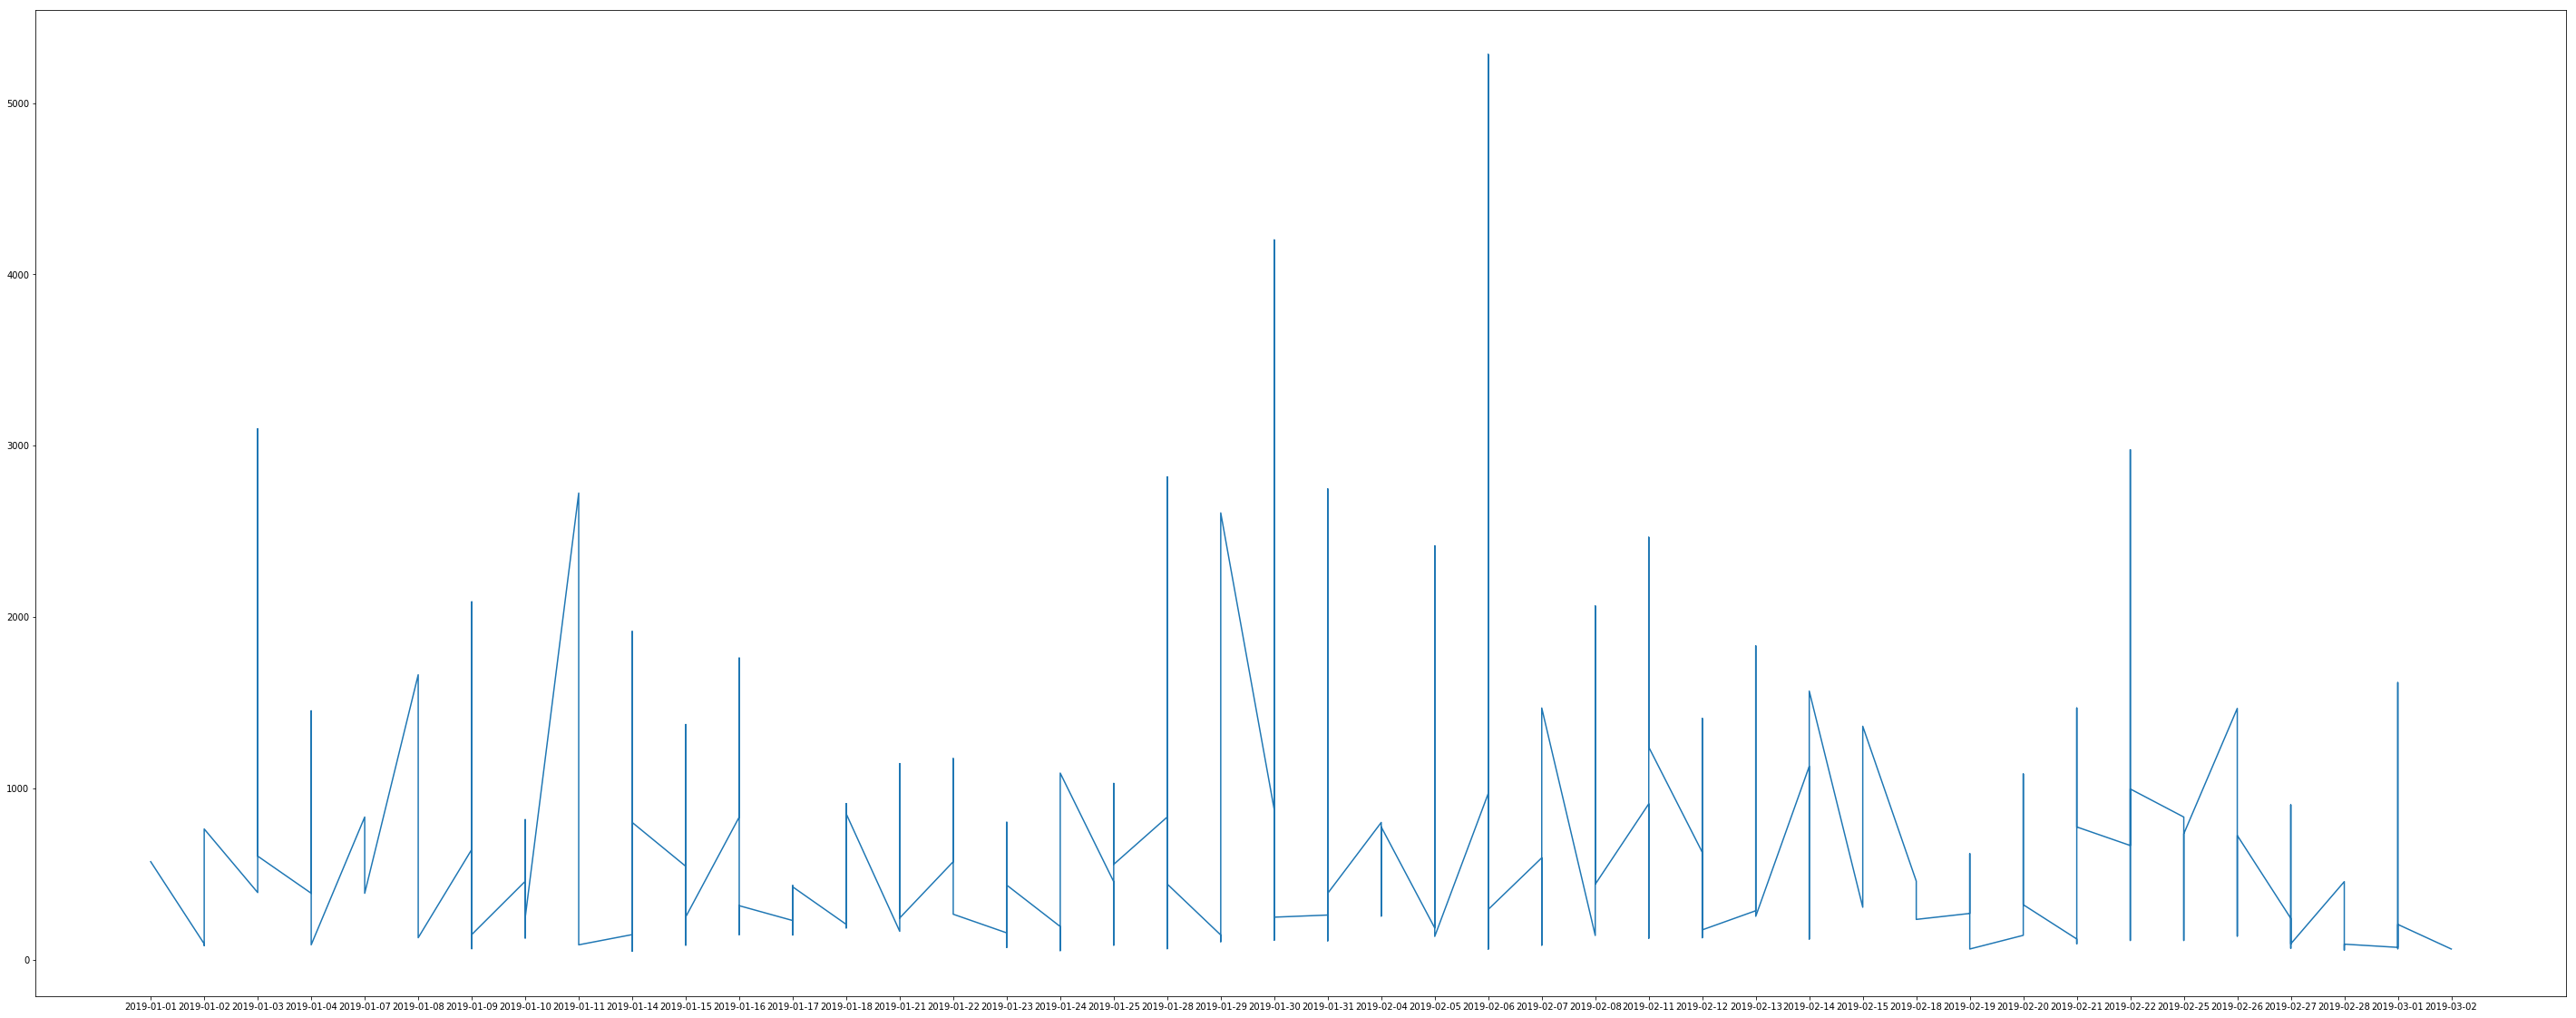

In [24]:
plt.figure(figsize=(50,20))
plt.plot(cx_data.sales_date, cx_data.value)
plt.show()

Graph is too varying - trying to extract week of year to smoothen it out

In [12]:
data.sales_date.dtype

dtype('O')

In [13]:
data.sales_date = pd.to_datetime(data.sales_date)

In [14]:
data.sales_date.dtype

dtype('<M8[ns]')

In [15]:
data['weekyear'] = data.sales_date.dt.week

In [16]:
data[['weekyear', 'sales_date']].head()

,weekyear,sales_date
0,1,2017-01-04
1,1,2017-01-05
2,2,2017-01-10
3,2,2017-01-11
4,2,2017-01-12


In [85]:
df = data[['weekyear', 'sku_class', 'value', 'cases', 'year']].groupby(['year', 'weekyear', 'sku_class'], as_index=False).sum()

In [86]:
df.head()

,year,weekyear,sku_class,value,cases
0,2016,34,BX,0.00,1
1,2016,34,BY,0.00,3
2,2016,34,CY,0.00,1
3,2016,49,CY,4884.80,32
4,2016,49,CZ,59524.92,1659


In [96]:
df = df[(df.value >= 1) & (df.cases >= 1)]

In [97]:
df.head()

,year,weekyear,sku_class,value,cases
3,2016,49,CY,4884.80,32
4,2016,49,CZ,59524.92,1659
5,2016,52,AX,1340828.25,45574
6,2016,52,AY,153592.97,13651
7,2016,52,AZ,53529.30,17502


In [98]:
weekyear_data = df[(df.year == 2018)]

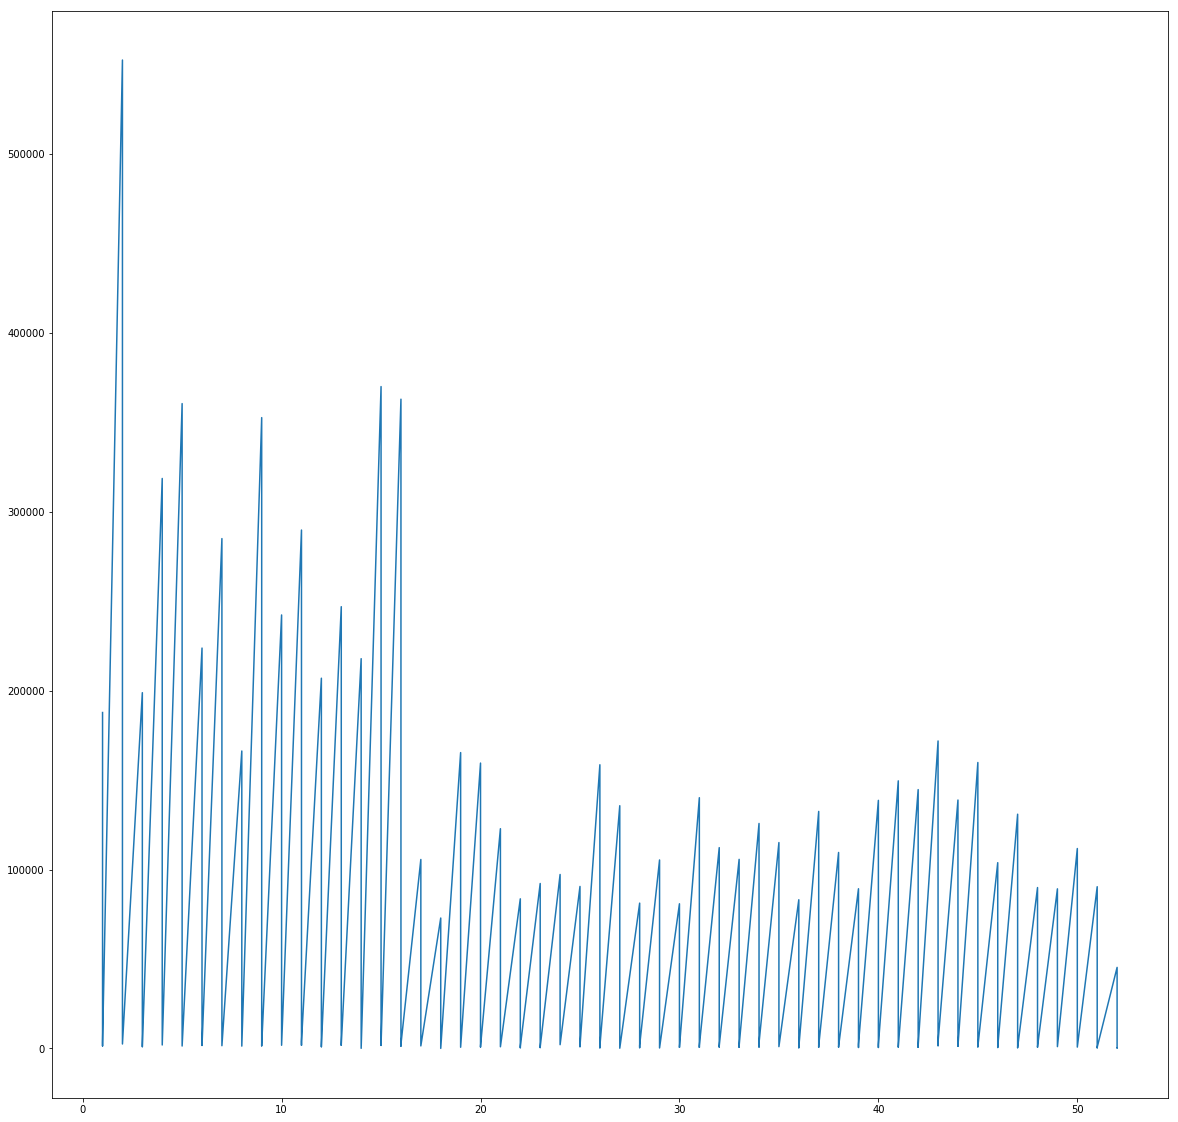

In [101]:
plt.figure(figsize=(20,20))
plt.plot(weekyear_data.weekyear, weekyear_data.cases)
plt.show()

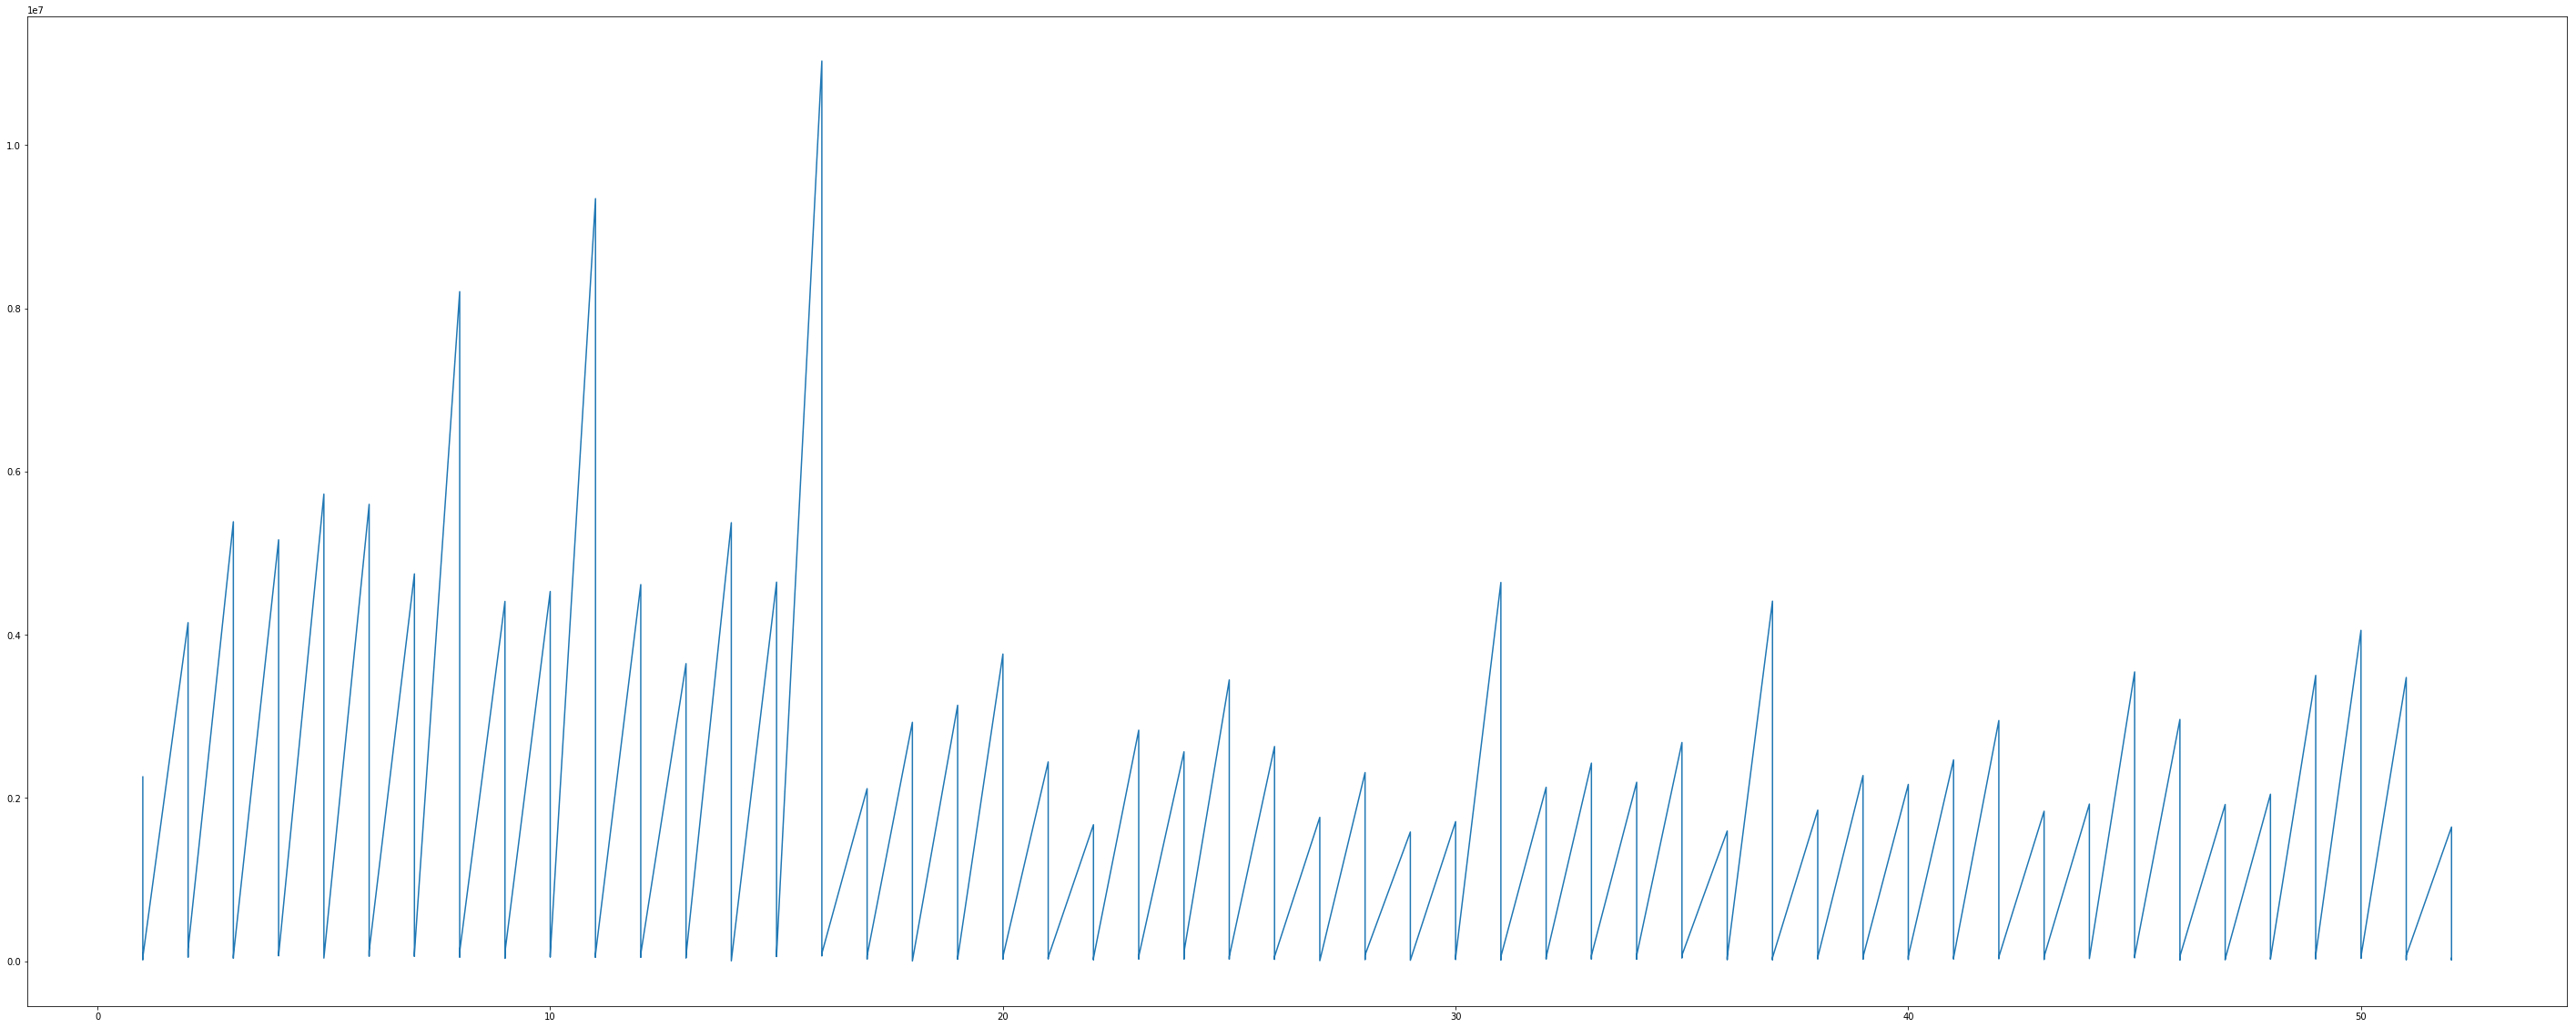

In [91]:
plt.figure(figsize=(50,20))
plt.plot(weekyear_data.weekyear, weekyear_data.value)
plt.show()

In [51]:
weekyear_cx_data = df[(df.year == 2018) & (df.sku_class == 'CX')]

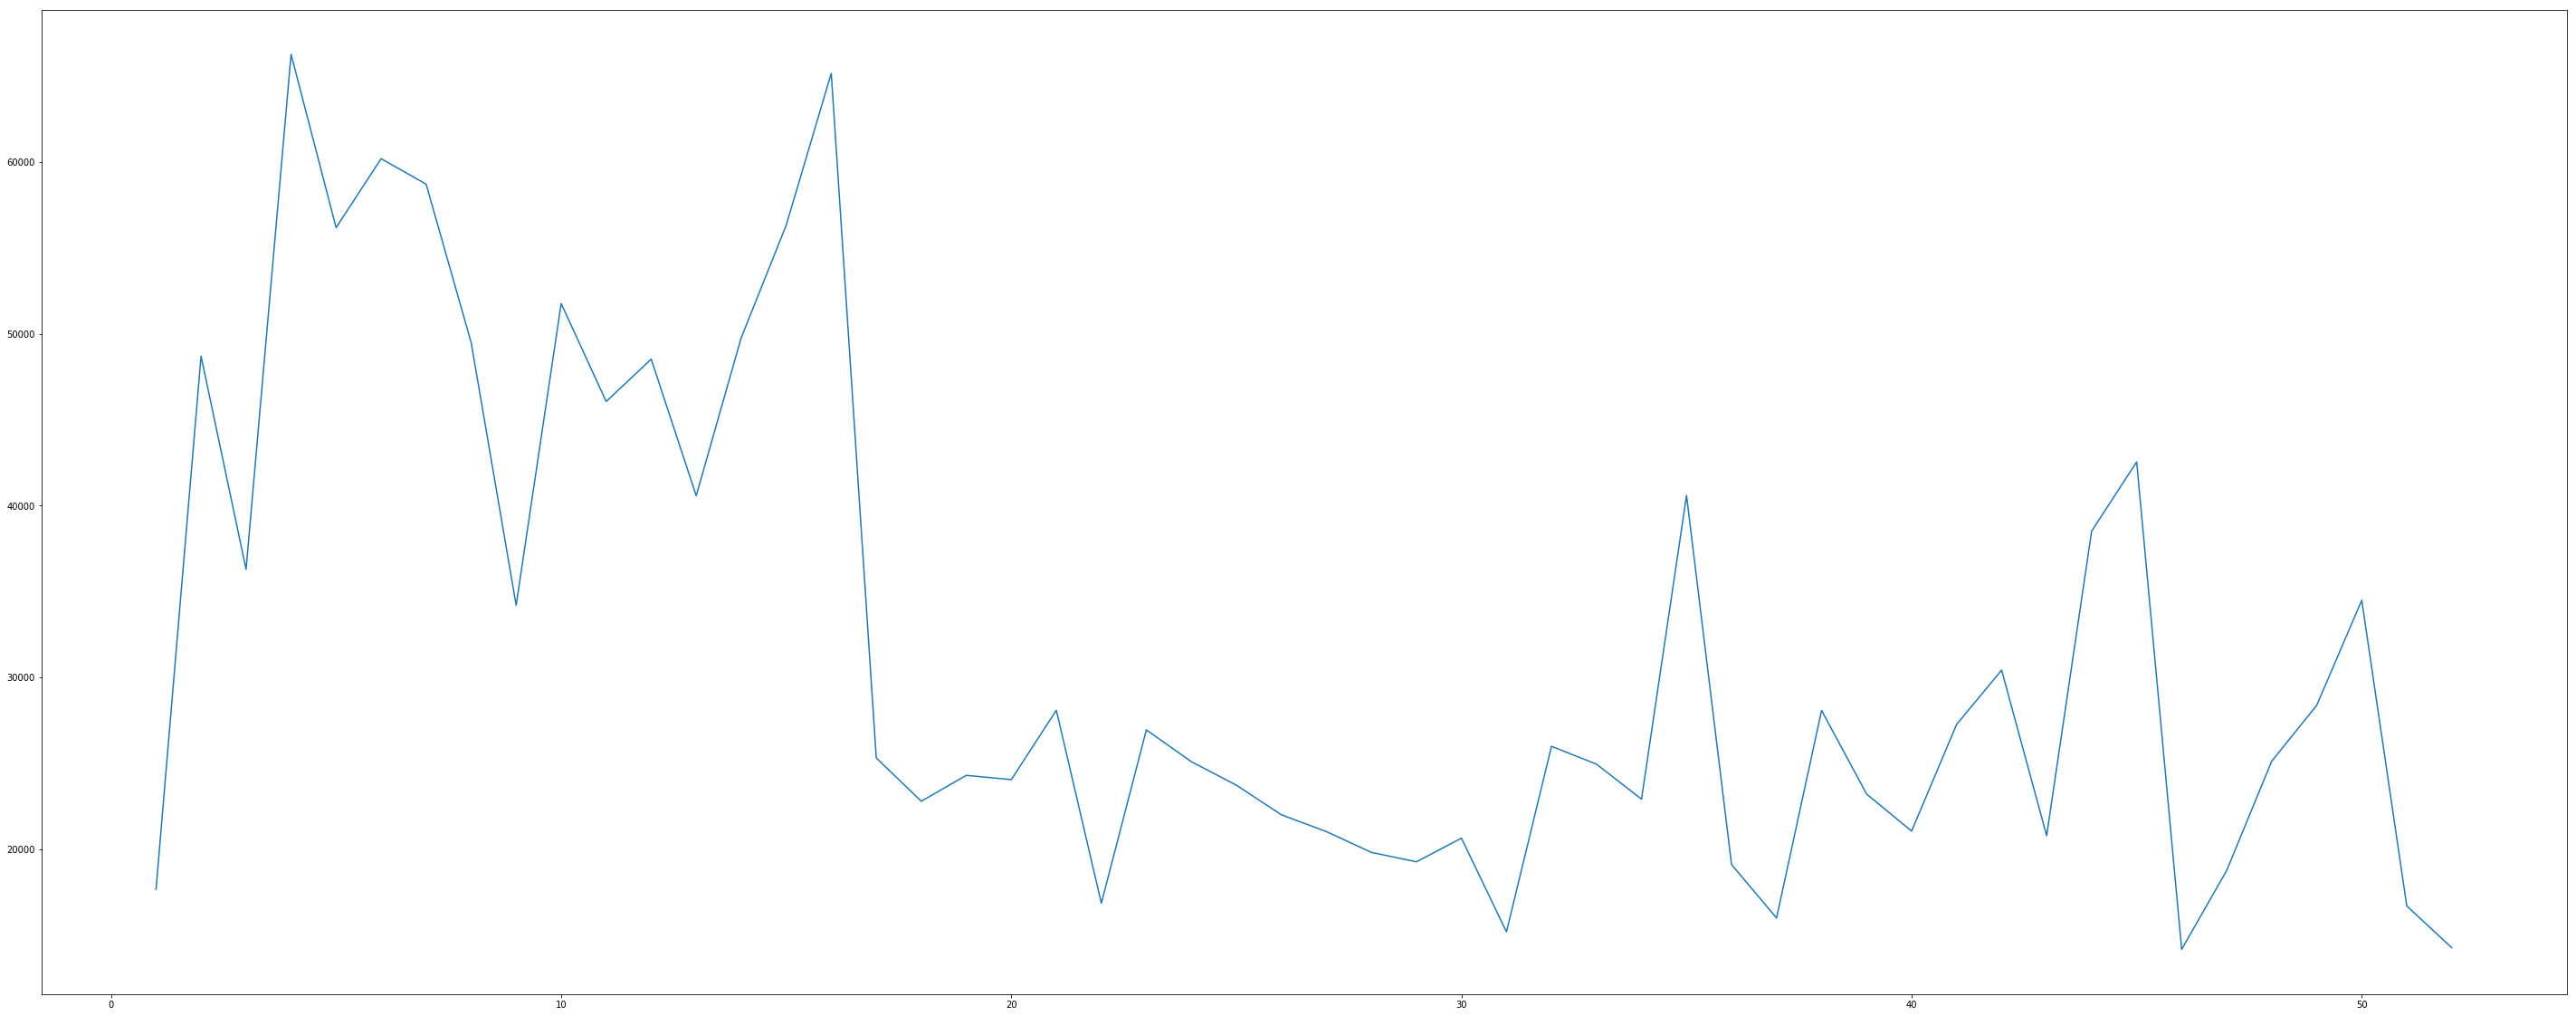

In [52]:
plt.figure(figsize=(50,20))
plt.plot(weekyear_cx_data.weekyear, weekyear_cx_data.value)
plt.show()

In [53]:
def sku_class_map(sku_class, year):
    weekyear_data = df[(df.year == year) & (df.sku_class == sku_class)]
    plt.figure(figsize=(50,20))
    plt.plot(weekyear_data.weekyear, weekyear_data.value)
    plt.show()

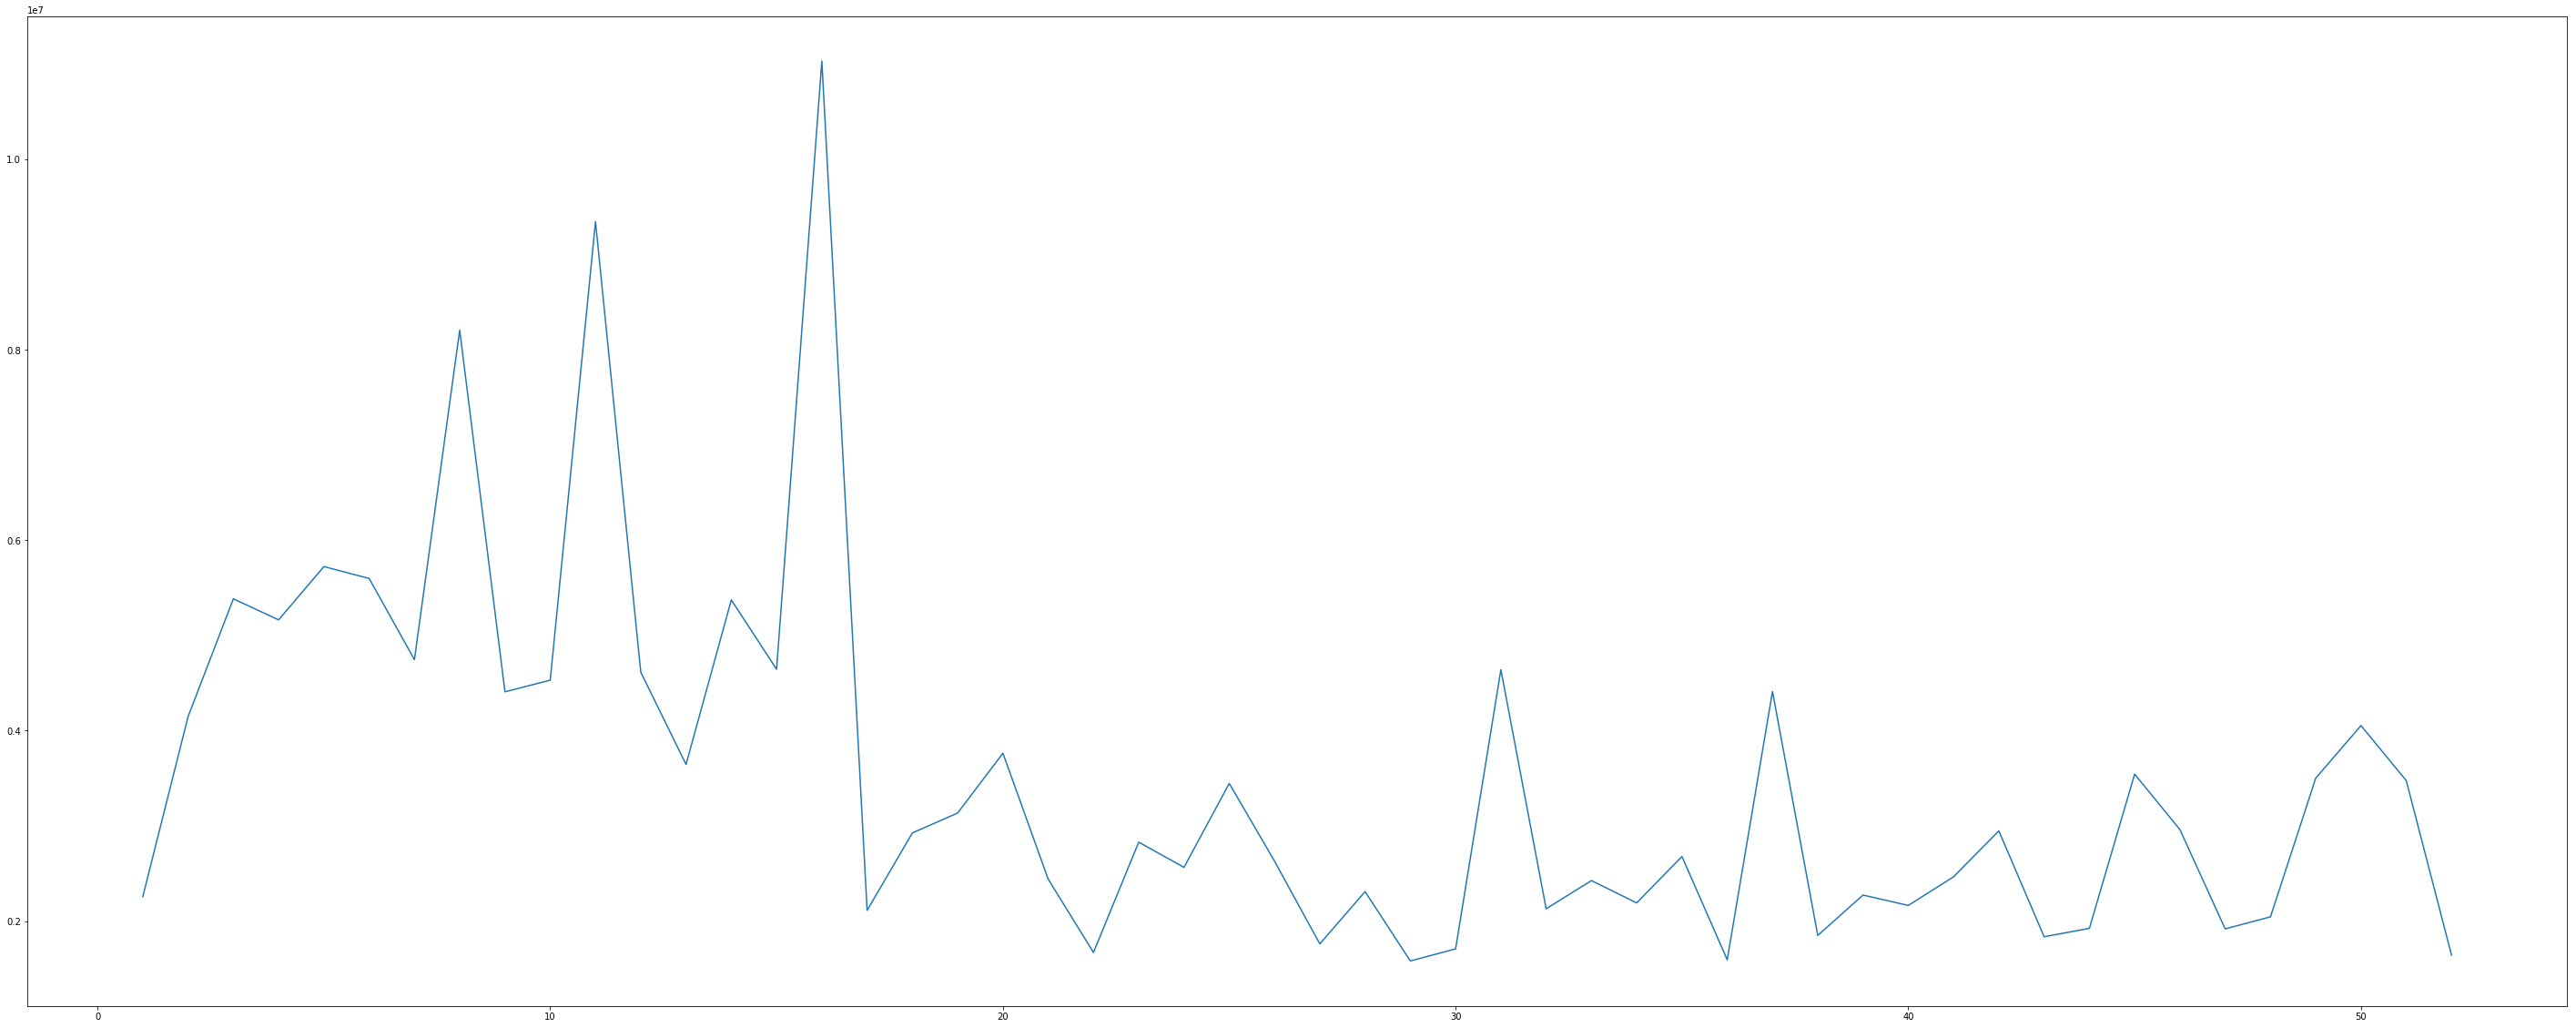

In [55]:
sku_class_map('AX', 2018)

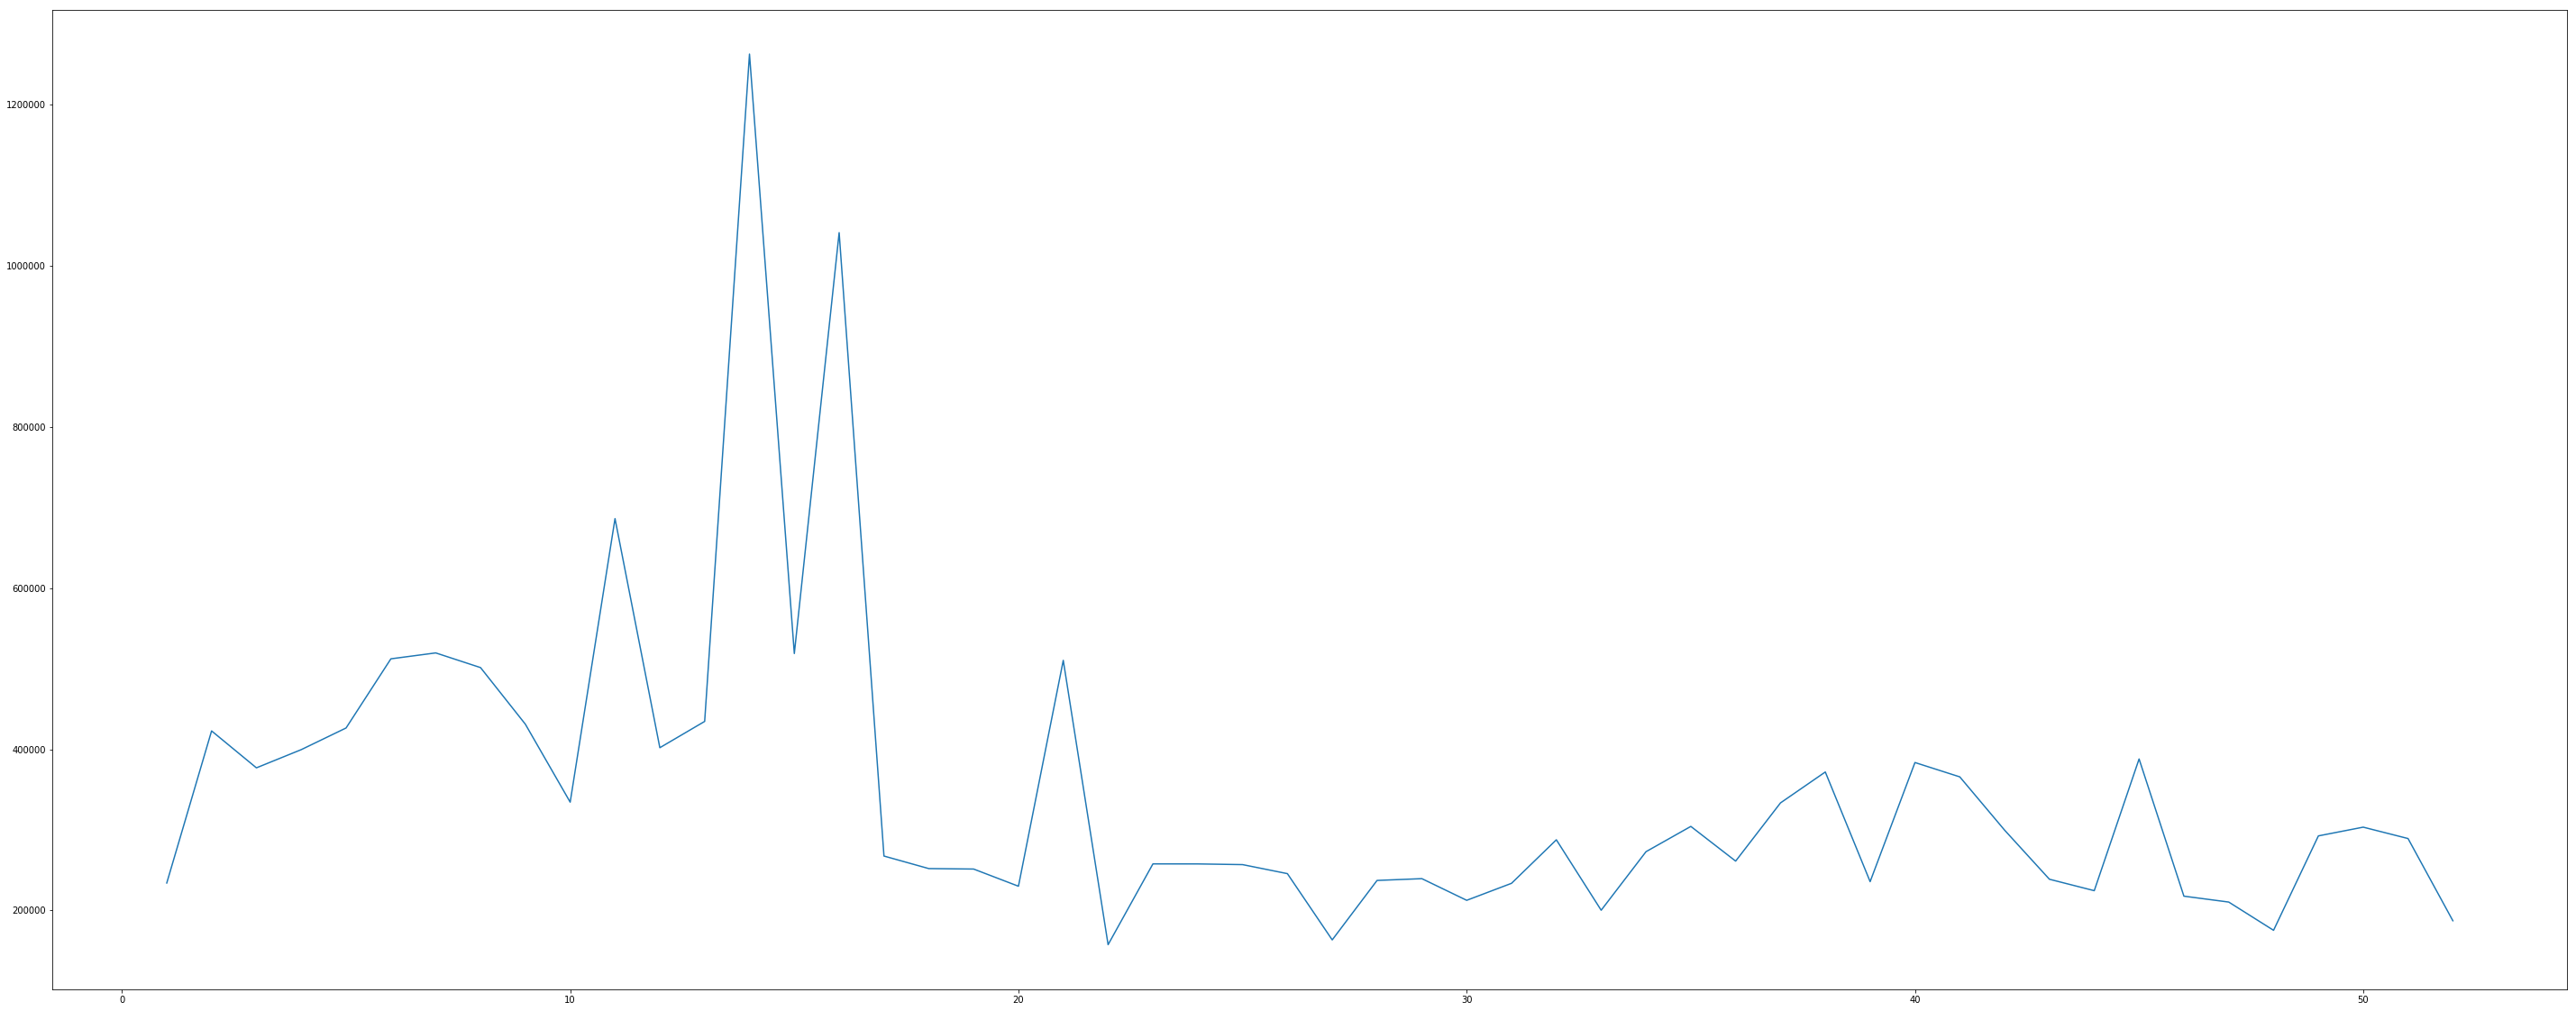

In [56]:
sku_class_map('BY', 2018)

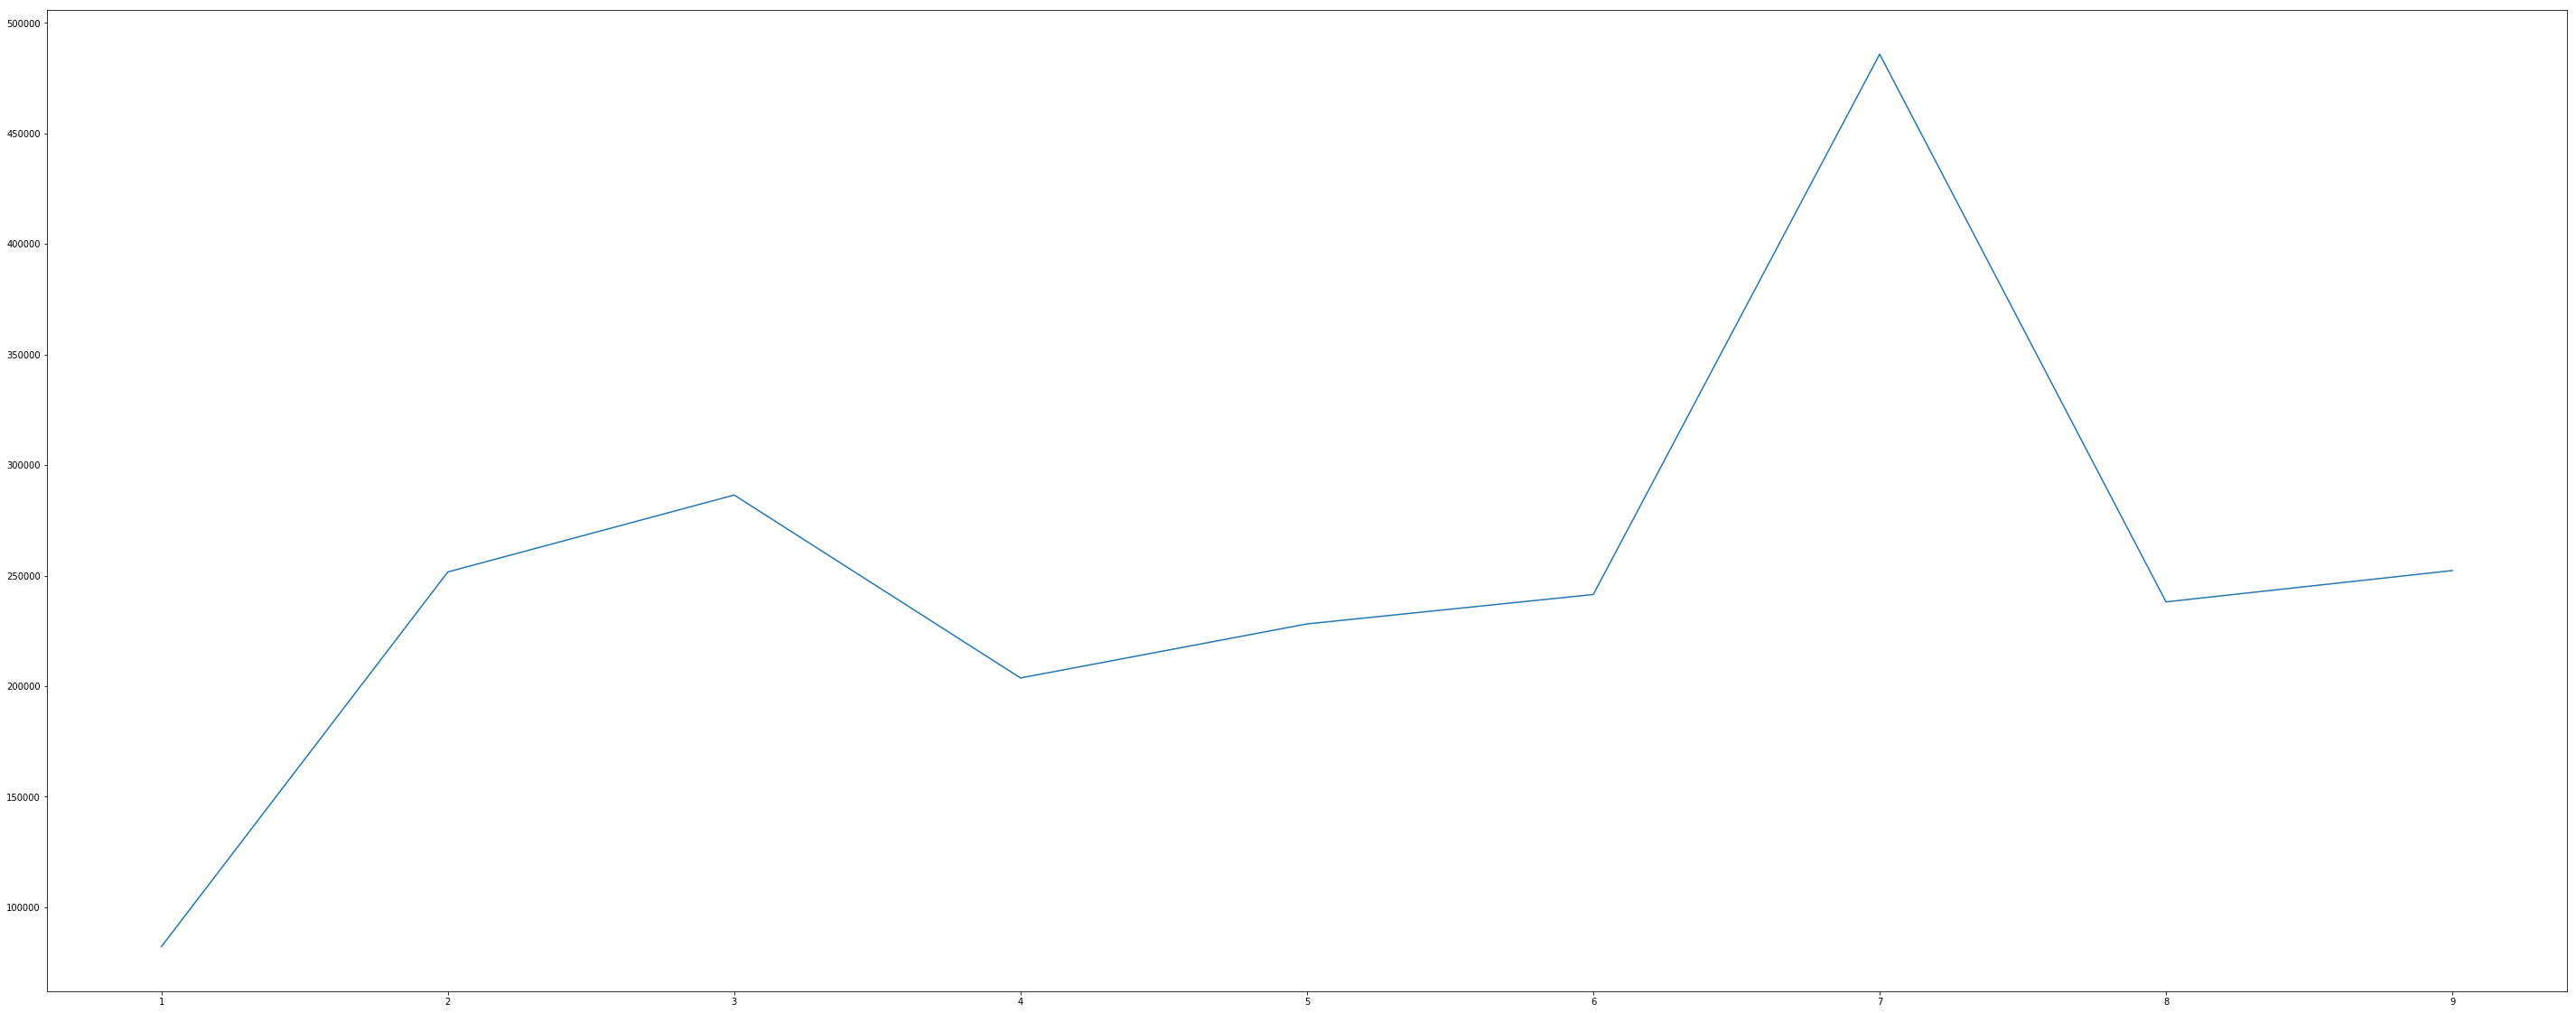

In [57]:
sku_class_map('BY', 2019)

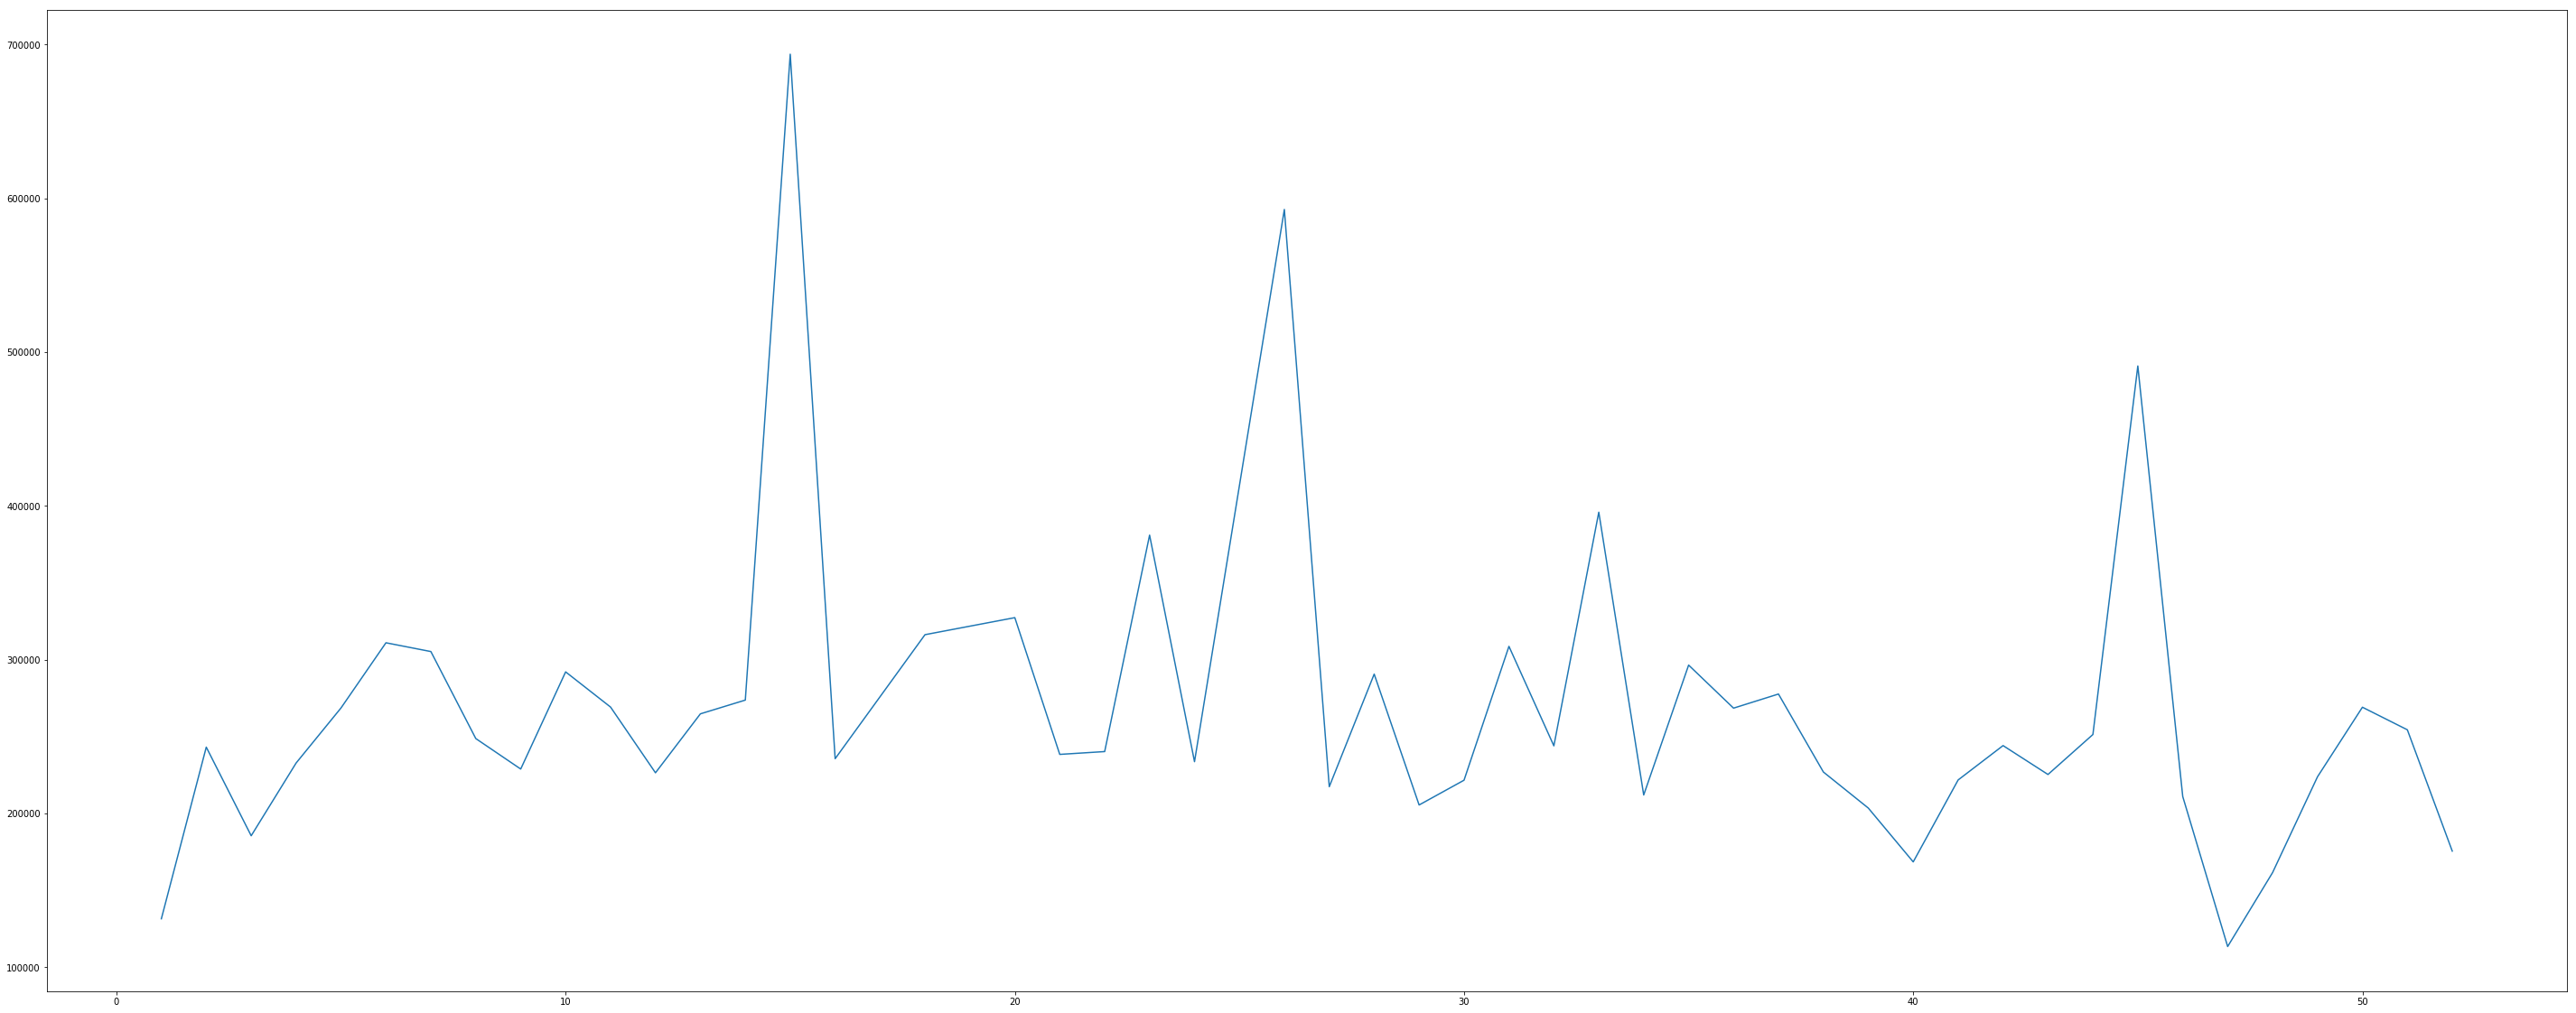

In [58]:
sku_class_map('BY', 2017)

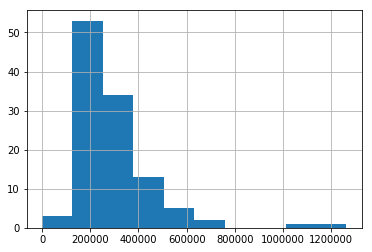

In [59]:
df[(df.sku_class == 'BY')].value.hist()

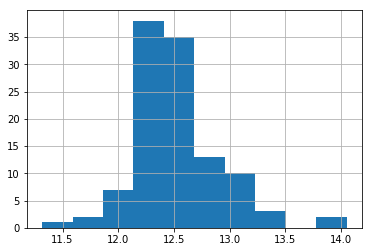

In [62]:
df[(df.sku_class == 'BY') & (df.value >= 1)].value.apply(lambda x: np.log(x+1)).hist()

a normal distribution is perfect for the prediction of our model

## Feature Extraction

In [19]:
cols

Index(['material', 'plant_code', 'cases', 'value', 'sales_date', 'f_day',
       'adbno', 'product_description', 'service_level', 'mrp_desc',
       'group2_desc', 'group3_desc', 'group6_desc', 'est_lead_time',
       'sku_class', 'IS_HOL', 'day', 'month', 'year', 'log_cases'],
      dtype='object')

In [20]:
features = ['material', 'plant_code', 'service_level', 'est_lead_time', 'sku_class', 'IS_HOL', 'day', 'month', 'year', 'weekyear']

In [21]:
from sklearn.model_selection import KFold,GridSearchCV,train_test_split

In [72]:
train_data = data[data.value >= 1]
x_train, x_val, y_train, y_val = train_test_split(train_data[features], train_data.value.apply(lambda x: np.log(x+1)))

## Train Model (now only on categorical features)

In [22]:
!! pip3 install catboost

['Requirement already satisfied: catboost in /usr/local/lib/python3.7/site-packages (0.15.1)',
 'Requirement already satisfied: graphviz in /usr/local/lib/python3.7/site-packages (from catboost) (0.11)',
 'Requirement already satisfied: six in /usr/local/Cellar/ipython/7.3.0/libexec/vendor/lib/python3.7/site-packages (from catboost) (1.12.0)',
 'Requirement already satisfied: numpy>=1.16.0 in /usr/local/lib/python3.7/site-packages (from catboost) (1.16.3)',
 'Requirement already satisfied: pandas>=0.19.1 in /usr/local/lib/python3.7/site-packages (from catboost) (0.24.2)',
 'Requirement already satisfied: pytz>=2011k in /usr/local/lib/python3.7/site-packages (from pandas>=0.19.1->catboost) (2019.1)',
 'Requirement already satisfied: python-dateutil>=2.5.0 in /usr/local/Cellar/ipython/7.3.0/libexec/vendor/lib/python3.7/site-packages (from pandas>=0.19.1->catboost) (2.8.0)']

In [23]:
from catboost import CatBoostRegressor

In [79]:
cat = CatBoostRegressor()

In [34]:
categorical_features = ['material', 'plant_code', 'sku_class', 'day', 'month', 'year', 'weekyear']

In [82]:
cat.fit(x_train, y_train, cat_features=categorical_features)

0:	learn: 6.6231560	total: 196ms	remaining: 3m 16s
1:	learn: 6.4324111	total: 303ms	remaining: 2m 31s
2:	learn: 6.2484074	total: 417ms	remaining: 2m 18s
3:	learn: 6.0695022	total: 592ms	remaining: 2m 27s
4:	learn: 5.8962480	total: 704ms	remaining: 2m 20s
5:	learn: 5.7278015	total: 1.06s	remaining: 2m 56s
6:	learn: 5.5665496	total: 1.11s	remaining: 2m 37s
7:	learn: 5.4089674	total: 1.28s	remaining: 2m 38s
8:	learn: 5.2568329	total: 1.39s	remaining: 2m 33s
9:	learn: 5.1087890	total: 1.52s	remaining: 2m 30s
10:	learn: 4.9659000	total: 1.69s	remaining: 2m 32s
11:	learn: 4.8278683	total: 1.76s	remaining: 2m 25s
12:	learn: 4.6951607	total: 1.79s	remaining: 2m 16s
13:	learn: 4.5651789	total: 1.98s	remaining: 2m 19s
14:	learn: 4.4400753	total: 2.03s	remaining: 2m 13s
15:	learn: 4.3190434	total: 2.12s	remaining: 2m 10s
16:	learn: 4.2015410	total: 2.31s	remaining: 2m 13s
17:	learn: 4.0881116	total: 2.44s	remaining: 2m 13s
18:	learn: 3.9777763	total: 2.58s	remaining: 2m 13s
19:	learn: 3.8710192	t

158:	learn: 1.0532537	total: 26.5s	remaining: 2m 20s
159:	learn: 1.0528826	total: 26.7s	remaining: 2m 20s
160:	learn: 1.0525664	total: 27s	remaining: 2m 20s
161:	learn: 1.0521891	total: 27.3s	remaining: 2m 21s
162:	learn: 1.0518620	total: 27.7s	remaining: 2m 22s
163:	learn: 1.0515391	total: 28.1s	remaining: 2m 23s
164:	learn: 1.0511712	total: 28.3s	remaining: 2m 22s
165:	learn: 1.0507624	total: 28.6s	remaining: 2m 23s
166:	learn: 1.0504494	total: 28.9s	remaining: 2m 24s
167:	learn: 1.0501922	total: 29.3s	remaining: 2m 24s
168:	learn: 1.0499119	total: 29.5s	remaining: 2m 24s
169:	learn: 1.0496639	total: 29.7s	remaining: 2m 25s
170:	learn: 1.0494472	total: 29.9s	remaining: 2m 25s
171:	learn: 1.0492032	total: 30.1s	remaining: 2m 24s
172:	learn: 1.0489209	total: 30.4s	remaining: 2m 25s
173:	learn: 1.0486325	total: 30.6s	remaining: 2m 25s
174:	learn: 1.0484093	total: 30.8s	remaining: 2m 25s
175:	learn: 1.0481950	total: 30.9s	remaining: 2m 24s
176:	learn: 1.0478985	total: 31.1s	remaining: 2m

314:	learn: 1.0303893	total: 56s	remaining: 2m 1s
315:	learn: 1.0303202	total: 56.2s	remaining: 2m 1s
316:	learn: 1.0302743	total: 56.4s	remaining: 2m 1s
317:	learn: 1.0301715	total: 56.5s	remaining: 2m 1s
318:	learn: 1.0300893	total: 56.6s	remaining: 2m
319:	learn: 1.0299980	total: 56.8s	remaining: 2m
320:	learn: 1.0299559	total: 57s	remaining: 2m
321:	learn: 1.0298399	total: 57.1s	remaining: 2m
322:	learn: 1.0297973	total: 57.3s	remaining: 2m
323:	learn: 1.0297029	total: 57.5s	remaining: 1m 59s
324:	learn: 1.0296543	total: 57.6s	remaining: 1m 59s
325:	learn: 1.0296121	total: 57.8s	remaining: 1m 59s
326:	learn: 1.0295265	total: 58s	remaining: 1m 59s
327:	learn: 1.0294421	total: 58.1s	remaining: 1m 59s
328:	learn: 1.0294135	total: 58.2s	remaining: 1m 58s
329:	learn: 1.0293578	total: 58.4s	remaining: 1m 58s
330:	learn: 1.0292710	total: 58.5s	remaining: 1m 58s
331:	learn: 1.0292194	total: 58.6s	remaining: 1m 57s
332:	learn: 1.0291302	total: 58.8s	remaining: 1m 57s
333:	learn: 1.0290653	t

470:	learn: 1.0216526	total: 1m 21s	remaining: 1m 31s
471:	learn: 1.0215956	total: 1m 21s	remaining: 1m 30s
472:	learn: 1.0215525	total: 1m 21s	remaining: 1m 30s
473:	learn: 1.0215130	total: 1m 21s	remaining: 1m 30s
474:	learn: 1.0214604	total: 1m 21s	remaining: 1m 30s
475:	learn: 1.0214248	total: 1m 21s	remaining: 1m 30s
476:	learn: 1.0213844	total: 1m 22s	remaining: 1m 29s
477:	learn: 1.0213533	total: 1m 22s	remaining: 1m 29s
478:	learn: 1.0213083	total: 1m 22s	remaining: 1m 29s
479:	learn: 1.0212532	total: 1m 22s	remaining: 1m 29s
480:	learn: 1.0212180	total: 1m 22s	remaining: 1m 29s
481:	learn: 1.0211575	total: 1m 22s	remaining: 1m 28s
482:	learn: 1.0211089	total: 1m 22s	remaining: 1m 28s
483:	learn: 1.0210747	total: 1m 22s	remaining: 1m 28s
484:	learn: 1.0210431	total: 1m 23s	remaining: 1m 28s
485:	learn: 1.0210103	total: 1m 23s	remaining: 1m 28s
486:	learn: 1.0209464	total: 1m 23s	remaining: 1m 27s
487:	learn: 1.0209150	total: 1m 23s	remaining: 1m 27s
488:	learn: 1.0208917	total:

624:	learn: 1.0160940	total: 1m 46s	remaining: 1m 3s
625:	learn: 1.0160823	total: 1m 46s	remaining: 1m 3s
626:	learn: 1.0160577	total: 1m 46s	remaining: 1m 3s
627:	learn: 1.0160438	total: 1m 46s	remaining: 1m 3s
628:	learn: 1.0160233	total: 1m 46s	remaining: 1m 3s
629:	learn: 1.0159881	total: 1m 47s	remaining: 1m 2s
630:	learn: 1.0159559	total: 1m 47s	remaining: 1m 2s
631:	learn: 1.0159205	total: 1m 47s	remaining: 1m 2s
632:	learn: 1.0158907	total: 1m 47s	remaining: 1m 2s
633:	learn: 1.0158781	total: 1m 47s	remaining: 1m 2s
634:	learn: 1.0158340	total: 1m 47s	remaining: 1m 2s
635:	learn: 1.0158122	total: 1m 48s	remaining: 1m 1s
636:	learn: 1.0157827	total: 1m 48s	remaining: 1m 1s
637:	learn: 1.0157672	total: 1m 48s	remaining: 1m 1s
638:	learn: 1.0157487	total: 1m 48s	remaining: 1m 1s
639:	learn: 1.0156908	total: 1m 48s	remaining: 1m 1s
640:	learn: 1.0156659	total: 1m 48s	remaining: 1m 1s
641:	learn: 1.0156288	total: 1m 49s	remaining: 1m
642:	learn: 1.0156170	total: 1m 49s	remaining: 1m

781:	learn: 1.0125685	total: 2m 12s	remaining: 36.9s
782:	learn: 1.0125525	total: 2m 12s	remaining: 36.7s
783:	learn: 1.0125312	total: 2m 12s	remaining: 36.5s
784:	learn: 1.0125151	total: 2m 12s	remaining: 36.4s
785:	learn: 1.0125038	total: 2m 12s	remaining: 36.2s
786:	learn: 1.0124905	total: 2m 13s	remaining: 36s
787:	learn: 1.0124763	total: 2m 13s	remaining: 35.8s
788:	learn: 1.0124639	total: 2m 13s	remaining: 35.6s
789:	learn: 1.0124465	total: 2m 13s	remaining: 35.5s
790:	learn: 1.0124265	total: 2m 13s	remaining: 35.3s
791:	learn: 1.0124062	total: 2m 13s	remaining: 35.1s
792:	learn: 1.0123900	total: 2m 13s	remaining: 35s
793:	learn: 1.0123671	total: 2m 14s	remaining: 34.8s
794:	learn: 1.0123628	total: 2m 14s	remaining: 34.6s
795:	learn: 1.0123334	total: 2m 14s	remaining: 34.4s
796:	learn: 1.0123205	total: 2m 14s	remaining: 34.2s
797:	learn: 1.0123034	total: 2m 14s	remaining: 34.1s
798:	learn: 1.0122948	total: 2m 14s	remaining: 33.9s
799:	learn: 1.0122871	total: 2m 14s	remaining: 33.

937:	learn: 1.0099735	total: 2m 40s	remaining: 10.6s
938:	learn: 1.0099591	total: 2m 40s	remaining: 10.4s
939:	learn: 1.0099388	total: 2m 41s	remaining: 10.3s
940:	learn: 1.0099350	total: 2m 41s	remaining: 10.1s
941:	learn: 1.0099143	total: 2m 41s	remaining: 9.94s
942:	learn: 1.0099049	total: 2m 41s	remaining: 9.78s
943:	learn: 1.0098932	total: 2m 41s	remaining: 9.61s
944:	learn: 1.0098856	total: 2m 42s	remaining: 9.44s
945:	learn: 1.0098637	total: 2m 42s	remaining: 9.27s
946:	learn: 1.0098478	total: 2m 42s	remaining: 9.1s
947:	learn: 1.0098413	total: 2m 42s	remaining: 8.92s
948:	learn: 1.0098391	total: 2m 42s	remaining: 8.75s
949:	learn: 1.0098312	total: 2m 43s	remaining: 8.59s
950:	learn: 1.0098204	total: 2m 43s	remaining: 8.42s
951:	learn: 1.0098008	total: 2m 43s	remaining: 8.25s
952:	learn: 1.0097965	total: 2m 43s	remaining: 8.08s
953:	learn: 1.0097921	total: 2m 44s	remaining: 7.91s
954:	learn: 1.0097401	total: 2m 44s	remaining: 7.74s
955:	learn: 1.0097280	total: 2m 44s	remaining: 

In [88]:
y_pred = cat.predict(x_train)

In [39]:
from sklearn.metrics import mean_squared_error

In [85]:
mean_squared_error(y_val, y_pred)

1.0040270312003352

In [90]:
f = lambda x: np.exp(x) - 1
mean_squared_error(f(y_train), f(y_pred))

38657776.35639469

We have to check now what the issues was with the data. lets plot histogram of train data

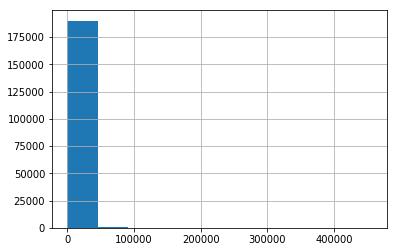

In [91]:
train_data.value.hist()

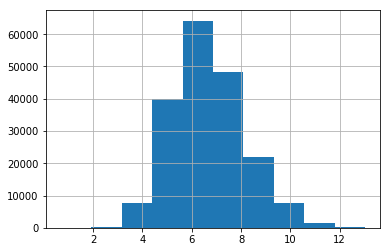

In [93]:
train_data.value.apply(lambda x: np.log(x + 1)).hist()

In [94]:
from scipy.stats import zscore

In [99]:
train_data = train_data[np.abs(zscore(train_data.value.apply(lambda x: np.log(x + 1))) < 3)]

In [100]:
x_train, x_val, y_train, y_val = train_test_split(train_data[features], train_data.value.apply(lambda x: np.log(x+1)))

In [101]:
cat1 = CatBoostRegressor()

In [102]:
cat1.fit(x_train, y_train, cat_features=categorical_features)

0:	learn: 6.6059303	total: 163ms	remaining: 2m 43s
1:	learn: 6.4158395	total: 256ms	remaining: 2m 7s
2:	learn: 6.2316902	total: 353ms	remaining: 1m 57s
3:	learn: 6.0530595	total: 559ms	remaining: 2m 19s
4:	learn: 5.8803240	total: 751ms	remaining: 2m 29s
5:	learn: 5.7134499	total: 813ms	remaining: 2m 14s
6:	learn: 5.5522159	total: 903ms	remaining: 2m 8s
7:	learn: 5.3952083	total: 992ms	remaining: 2m 3s
8:	learn: 5.2431998	total: 1.28s	remaining: 2m 21s
9:	learn: 5.0960297	total: 1.36s	remaining: 2m 14s
10:	learn: 4.9546220	total: 1.38s	remaining: 2m 4s
11:	learn: 4.8165459	total: 1.51s	remaining: 2m 4s
12:	learn: 4.6832206	total: 1.7s	remaining: 2m 9s
13:	learn: 4.5542662	total: 1.9s	remaining: 2m 14s
14:	learn: 4.4292995	total: 2.06s	remaining: 2m 15s
15:	learn: 4.3074629	total: 2.31s	remaining: 2m 22s
16:	learn: 4.1895166	total: 2.46s	remaining: 2m 22s
17:	learn: 4.0759567	total: 2.62s	remaining: 2m 23s
18:	learn: 3.9664015	total: 2.74s	remaining: 2m 21s
19:	learn: 3.8600950	total: 2.

158:	learn: 1.0533032	total: 24.4s	remaining: 2m 9s
159:	learn: 1.0529045	total: 24.6s	remaining: 2m 9s
160:	learn: 1.0525161	total: 24.8s	remaining: 2m 9s
161:	learn: 1.0522033	total: 24.9s	remaining: 2m 8s
162:	learn: 1.0519308	total: 25.1s	remaining: 2m 8s
163:	learn: 1.0515417	total: 25.3s	remaining: 2m 9s
164:	learn: 1.0511215	total: 25.4s	remaining: 2m 8s
165:	learn: 1.0507776	total: 25.5s	remaining: 2m 8s
166:	learn: 1.0504848	total: 25.7s	remaining: 2m 8s
167:	learn: 1.0502258	total: 25.8s	remaining: 2m 7s
168:	learn: 1.0498889	total: 26s	remaining: 2m 7s
169:	learn: 1.0495661	total: 26.2s	remaining: 2m 7s
170:	learn: 1.0492546	total: 26.4s	remaining: 2m 8s
171:	learn: 1.0489256	total: 26.5s	remaining: 2m 7s
172:	learn: 1.0487124	total: 26.7s	remaining: 2m 7s
173:	learn: 1.0483732	total: 26.9s	remaining: 2m 7s
174:	learn: 1.0481122	total: 27s	remaining: 2m 7s
175:	learn: 1.0478264	total: 27.2s	remaining: 2m 7s
176:	learn: 1.0475376	total: 27.3s	remaining: 2m 7s
177:	learn: 1.04

316:	learn: 1.0295475	total: 52.7s	remaining: 1m 53s
317:	learn: 1.0295155	total: 52.9s	remaining: 1m 53s
318:	learn: 1.0294810	total: 53.1s	remaining: 1m 53s
319:	learn: 1.0294183	total: 53.2s	remaining: 1m 53s
320:	learn: 1.0293487	total: 53.4s	remaining: 1m 53s
321:	learn: 1.0292677	total: 53.6s	remaining: 1m 52s
322:	learn: 1.0291914	total: 53.7s	remaining: 1m 52s
323:	learn: 1.0291231	total: 53.9s	remaining: 1m 52s
324:	learn: 1.0290532	total: 54.1s	remaining: 1m 52s
325:	learn: 1.0289836	total: 54.4s	remaining: 1m 52s
326:	learn: 1.0289213	total: 54.6s	remaining: 1m 52s
327:	learn: 1.0288706	total: 54.8s	remaining: 1m 52s
328:	learn: 1.0288093	total: 54.9s	remaining: 1m 51s
329:	learn: 1.0287528	total: 55s	remaining: 1m 51s
330:	learn: 1.0287042	total: 55.2s	remaining: 1m 51s
331:	learn: 1.0286535	total: 55.3s	remaining: 1m 51s
332:	learn: 1.0285763	total: 55.5s	remaining: 1m 51s
333:	learn: 1.0285429	total: 55.7s	remaining: 1m 50s
334:	learn: 1.0284903	total: 55.8s	remaining: 1m

470:	learn: 1.0212603	total: 1m 21s	remaining: 1m 31s
471:	learn: 1.0212137	total: 1m 21s	remaining: 1m 31s
472:	learn: 1.0211672	total: 1m 22s	remaining: 1m 31s
473:	learn: 1.0211511	total: 1m 22s	remaining: 1m 31s
474:	learn: 1.0211088	total: 1m 22s	remaining: 1m 31s
475:	learn: 1.0210921	total: 1m 22s	remaining: 1m 30s
476:	learn: 1.0210659	total: 1m 22s	remaining: 1m 30s
477:	learn: 1.0210271	total: 1m 22s	remaining: 1m 30s
478:	learn: 1.0209890	total: 1m 22s	remaining: 1m 30s
479:	learn: 1.0209301	total: 1m 23s	remaining: 1m 30s
480:	learn: 1.0208845	total: 1m 23s	remaining: 1m 29s
481:	learn: 1.0208325	total: 1m 23s	remaining: 1m 29s
482:	learn: 1.0207915	total: 1m 23s	remaining: 1m 29s
483:	learn: 1.0207428	total: 1m 23s	remaining: 1m 29s
484:	learn: 1.0207036	total: 1m 23s	remaining: 1m 29s
485:	learn: 1.0206517	total: 1m 24s	remaining: 1m 29s
486:	learn: 1.0205990	total: 1m 24s	remaining: 1m 29s
487:	learn: 1.0205809	total: 1m 24s	remaining: 1m 28s
488:	learn: 1.0205703	total:

623:	learn: 1.0161820	total: 1m 47s	remaining: 1m 4s
624:	learn: 1.0161640	total: 1m 47s	remaining: 1m 4s
625:	learn: 1.0161354	total: 1m 47s	remaining: 1m 4s
626:	learn: 1.0161085	total: 1m 47s	remaining: 1m 3s
627:	learn: 1.0160940	total: 1m 47s	remaining: 1m 3s
628:	learn: 1.0160660	total: 1m 47s	remaining: 1m 3s
629:	learn: 1.0160212	total: 1m 48s	remaining: 1m 3s
630:	learn: 1.0159724	total: 1m 48s	remaining: 1m 3s
631:	learn: 1.0159167	total: 1m 48s	remaining: 1m 3s
632:	learn: 1.0158950	total: 1m 49s	remaining: 1m 3s
633:	learn: 1.0158415	total: 1m 49s	remaining: 1m 3s
634:	learn: 1.0158143	total: 1m 49s	remaining: 1m 2s
635:	learn: 1.0158023	total: 1m 49s	remaining: 1m 2s
636:	learn: 1.0157811	total: 1m 49s	remaining: 1m 2s
637:	learn: 1.0157688	total: 1m 49s	remaining: 1m 2s
638:	learn: 1.0157411	total: 1m 50s	remaining: 1m 2s
639:	learn: 1.0157228	total: 1m 50s	remaining: 1m 2s
640:	learn: 1.0156942	total: 1m 50s	remaining: 1m 1s
641:	learn: 1.0156599	total: 1m 50s	remaining:

781:	learn: 1.0126687	total: 2m 15s	remaining: 37.7s
782:	learn: 1.0126404	total: 2m 15s	remaining: 37.5s
783:	learn: 1.0126121	total: 2m 15s	remaining: 37.4s
784:	learn: 1.0126075	total: 2m 15s	remaining: 37.2s
785:	learn: 1.0125938	total: 2m 15s	remaining: 37s
786:	learn: 1.0125666	total: 2m 16s	remaining: 36.8s
787:	learn: 1.0125569	total: 2m 16s	remaining: 36.6s
788:	learn: 1.0125480	total: 2m 16s	remaining: 36.5s
789:	learn: 1.0125300	total: 2m 16s	remaining: 36.3s
790:	learn: 1.0125156	total: 2m 17s	remaining: 36.2s
791:	learn: 1.0125127	total: 2m 17s	remaining: 36.1s
792:	learn: 1.0124895	total: 2m 17s	remaining: 35.9s
793:	learn: 1.0124657	total: 2m 17s	remaining: 35.8s
794:	learn: 1.0124558	total: 2m 17s	remaining: 35.6s
795:	learn: 1.0124298	total: 2m 18s	remaining: 35.4s
796:	learn: 1.0124168	total: 2m 18s	remaining: 35.2s
797:	learn: 1.0124080	total: 2m 18s	remaining: 35s
798:	learn: 1.0123751	total: 2m 18s	remaining: 34.9s
799:	learn: 1.0123527	total: 2m 18s	remaining: 34.

937:	learn: 1.0100892	total: 2m 42s	remaining: 10.8s
938:	learn: 1.0100662	total: 2m 43s	remaining: 10.6s
939:	learn: 1.0100589	total: 2m 43s	remaining: 10.5s
940:	learn: 1.0100540	total: 2m 44s	remaining: 10.3s
941:	learn: 1.0100426	total: 2m 44s	remaining: 10.1s
942:	learn: 1.0100233	total: 2m 44s	remaining: 9.94s
943:	learn: 1.0100174	total: 2m 44s	remaining: 9.77s
944:	learn: 1.0100004	total: 2m 44s	remaining: 9.59s
945:	learn: 1.0099778	total: 2m 45s	remaining: 9.42s
946:	learn: 1.0099703	total: 2m 45s	remaining: 9.24s
947:	learn: 1.0099462	total: 2m 45s	remaining: 9.07s
948:	learn: 1.0099318	total: 2m 45s	remaining: 8.89s
949:	learn: 1.0099112	total: 2m 45s	remaining: 8.72s
950:	learn: 1.0099036	total: 2m 45s	remaining: 8.54s
951:	learn: 1.0099006	total: 2m 45s	remaining: 8.37s
952:	learn: 1.0098880	total: 2m 46s	remaining: 8.19s
953:	learn: 1.0098472	total: 2m 46s	remaining: 8.02s
954:	learn: 1.0098388	total: 2m 46s	remaining: 7.84s
955:	learn: 1.0098113	total: 2m 46s	remaining:

In [106]:
y_pred = cat1.predict(x_val)

In [107]:
mean_squared_error(y_val, y_pred)

0.9876844120492952

In [108]:
mean_squared_error(f(y_val), f(y_pred))

15159948.26888644

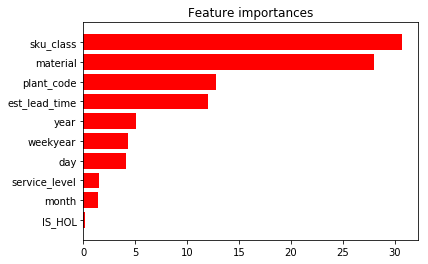

In [110]:
importances = cat1.feature_importances_
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(x_train.shape[1]), importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(x_train.shape[1]), [features[i] for i in indices])
plt.ylim([-1, x_train.shape[1]])
plt.show()

## let's try to adjust the data - we will train and predict based on cases instead of value

In [26]:
train_data = data[data.value >= 1]

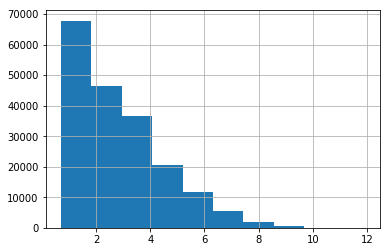

In [27]:
train_data.cases.apply(lambda x: np.log(x + 1)).hist()

In [28]:
from scipy.stats import zscore

In [29]:
train_data = train_data[np.abs(zscore(train_data.cases.apply(lambda x: np.log(x + 1))) < 3)]

In [30]:
x_train, x_val, y_train, y_val = train_test_split(train_data[features], train_data.cases.apply(lambda x: np.log(x+1)))

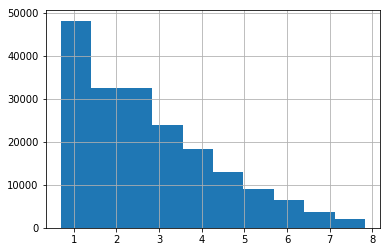

In [31]:
train_data.cases.apply(lambda x: np.log(x + 1)).hist()

In [32]:
cat2 = CatBoostRegressor()

In [35]:
cat2.fit(x_train, y_train, cat_features=categorical_features)

0:	learn: 3.1083212	total: 384ms	remaining: 6m 23s
1:	learn: 3.0355169	total: 480ms	remaining: 3m 59s
2:	learn: 2.9654306	total: 985ms	remaining: 5m 27s
3:	learn: 2.8978425	total: 1.24s	remaining: 5m 7s
4:	learn: 2.8326454	total: 1.68s	remaining: 5m 33s
5:	learn: 2.7698950	total: 1.83s	remaining: 5m 3s
6:	learn: 2.7095927	total: 1.99s	remaining: 4m 42s
7:	learn: 2.6512866	total: 2.41s	remaining: 4m 59s
8:	learn: 2.5959128	total: 2.73s	remaining: 5m
9:	learn: 2.5425329	total: 2.88s	remaining: 4m 45s
10:	learn: 2.4906881	total: 3.44s	remaining: 5m 9s
11:	learn: 2.4412192	total: 3.98s	remaining: 5m 27s
12:	learn: 2.3937643	total: 4.18s	remaining: 5m 17s
13:	learn: 2.3492153	total: 4.97s	remaining: 5m 49s
14:	learn: 2.3051307	total: 5.47s	remaining: 5m 59s
15:	learn: 2.2633732	total: 8.43s	remaining: 8m 38s
16:	learn: 2.2225551	total: 9.42s	remaining: 9m 4s
17:	learn: 2.1830734	total: 10.2s	remaining: 9m 15s
18:	learn: 2.1451174	total: 11.1s	remaining: 9m 33s
19:	learn: 2.1087609	total: 11

159:	learn: 1.2659061	total: 38.5s	remaining: 3m 22s
160:	learn: 1.2656449	total: 38.7s	remaining: 3m 21s
161:	learn: 1.2653670	total: 38.9s	remaining: 3m 21s
162:	learn: 1.2650459	total: 39.2s	remaining: 3m 21s
163:	learn: 1.2647973	total: 39.3s	remaining: 3m 20s
164:	learn: 1.2645015	total: 39.5s	remaining: 3m 19s
165:	learn: 1.2642210	total: 39.7s	remaining: 3m 19s
166:	learn: 1.2640428	total: 39.8s	remaining: 3m 18s
167:	learn: 1.2638551	total: 40s	remaining: 3m 18s
168:	learn: 1.2635698	total: 40.2s	remaining: 3m 17s
169:	learn: 1.2633663	total: 40.6s	remaining: 3m 18s
170:	learn: 1.2631028	total: 41s	remaining: 3m 18s
171:	learn: 1.2627919	total: 41.4s	remaining: 3m 19s
172:	learn: 1.2625517	total: 41.7s	remaining: 3m 19s
173:	learn: 1.2623448	total: 41.9s	remaining: 3m 19s
174:	learn: 1.2621355	total: 42.1s	remaining: 3m 18s
175:	learn: 1.2619412	total: 42.3s	remaining: 3m 18s
176:	learn: 1.2616618	total: 42.4s	remaining: 3m 17s
177:	learn: 1.2614472	total: 42.6s	remaining: 3m 1

315:	learn: 1.2453716	total: 1m 14s	remaining: 2m 42s
316:	learn: 1.2452492	total: 1m 15s	remaining: 2m 41s
317:	learn: 1.2452144	total: 1m 15s	remaining: 2m 41s
318:	learn: 1.2451763	total: 1m 15s	remaining: 2m 41s
319:	learn: 1.2450978	total: 1m 15s	remaining: 2m 41s
320:	learn: 1.2450722	total: 1m 15s	remaining: 2m 40s
321:	learn: 1.2450304	total: 1m 16s	remaining: 2m 40s
322:	learn: 1.2449466	total: 1m 16s	remaining: 2m 40s
323:	learn: 1.2448652	total: 1m 16s	remaining: 2m 39s
324:	learn: 1.2447793	total: 1m 16s	remaining: 2m 39s
325:	learn: 1.2447212	total: 1m 16s	remaining: 2m 38s
326:	learn: 1.2446822	total: 1m 17s	remaining: 2m 38s
327:	learn: 1.2446509	total: 1m 17s	remaining: 2m 38s
328:	learn: 1.2445834	total: 1m 17s	remaining: 2m 38s
329:	learn: 1.2445282	total: 1m 17s	remaining: 2m 37s
330:	learn: 1.2444757	total: 1m 17s	remaining: 2m 37s
331:	learn: 1.2444234	total: 1m 17s	remaining: 2m 36s
332:	learn: 1.2443681	total: 1m 18s	remaining: 2m 36s
333:	learn: 1.2443282	total:

468:	learn: 1.2371111	total: 1m 49s	remaining: 2m 4s
469:	learn: 1.2370796	total: 1m 50s	remaining: 2m 4s
470:	learn: 1.2370365	total: 1m 50s	remaining: 2m 3s
471:	learn: 1.2370054	total: 1m 50s	remaining: 2m 3s
472:	learn: 1.2369879	total: 1m 50s	remaining: 2m 3s
473:	learn: 1.2369360	total: 1m 51s	remaining: 2m 3s
474:	learn: 1.2368950	total: 1m 51s	remaining: 2m 3s
475:	learn: 1.2368318	total: 1m 51s	remaining: 2m 2s
476:	learn: 1.2367960	total: 1m 51s	remaining: 2m 2s
477:	learn: 1.2367627	total: 1m 52s	remaining: 2m 2s
478:	learn: 1.2367296	total: 1m 52s	remaining: 2m 2s
479:	learn: 1.2366969	total: 1m 52s	remaining: 2m 1s
480:	learn: 1.2366461	total: 1m 52s	remaining: 2m 1s
481:	learn: 1.2366077	total: 1m 52s	remaining: 2m 1s
482:	learn: 1.2365603	total: 1m 53s	remaining: 2m 1s
483:	learn: 1.2365332	total: 1m 53s	remaining: 2m
484:	learn: 1.2364815	total: 1m 53s	remaining: 2m
485:	learn: 1.2364529	total: 1m 53s	remaining: 2m
486:	learn: 1.2364294	total: 1m 54s	remaining: 2m
487:	

622:	learn: 1.2315989	total: 2m 19s	remaining: 1m 24s
623:	learn: 1.2315396	total: 2m 19s	remaining: 1m 24s
624:	learn: 1.2314738	total: 2m 19s	remaining: 1m 23s
625:	learn: 1.2314495	total: 2m 19s	remaining: 1m 23s
626:	learn: 1.2314437	total: 2m 19s	remaining: 1m 23s
627:	learn: 1.2314178	total: 2m 20s	remaining: 1m 22s
628:	learn: 1.2313910	total: 2m 20s	remaining: 1m 22s
629:	learn: 1.2313369	total: 2m 20s	remaining: 1m 22s
630:	learn: 1.2312923	total: 2m 20s	remaining: 1m 22s
631:	learn: 1.2312340	total: 2m 20s	remaining: 1m 22s
632:	learn: 1.2312180	total: 2m 21s	remaining: 1m 21s
633:	learn: 1.2311997	total: 2m 21s	remaining: 1m 21s
634:	learn: 1.2311786	total: 2m 21s	remaining: 1m 21s
635:	learn: 1.2311526	total: 2m 21s	remaining: 1m 21s
636:	learn: 1.2311378	total: 2m 21s	remaining: 1m 20s
637:	learn: 1.2310895	total: 2m 21s	remaining: 1m 20s
638:	learn: 1.2310772	total: 2m 22s	remaining: 1m 20s
639:	learn: 1.2310398	total: 2m 22s	remaining: 1m 20s
640:	learn: 1.2310264	total:

776:	learn: 1.2278491	total: 2m 47s	remaining: 48.1s
777:	learn: 1.2278220	total: 2m 47s	remaining: 47.9s
778:	learn: 1.2278050	total: 2m 47s	remaining: 47.6s
779:	learn: 1.2277922	total: 2m 48s	remaining: 47.4s
780:	learn: 1.2277732	total: 2m 48s	remaining: 47.2s
781:	learn: 1.2277602	total: 2m 48s	remaining: 47s
782:	learn: 1.2277307	total: 2m 48s	remaining: 46.7s
783:	learn: 1.2277236	total: 2m 48s	remaining: 46.5s
784:	learn: 1.2276978	total: 2m 48s	remaining: 46.3s
785:	learn: 1.2276853	total: 2m 49s	remaining: 46s
786:	learn: 1.2276713	total: 2m 49s	remaining: 45.8s
787:	learn: 1.2276593	total: 2m 49s	remaining: 45.6s
788:	learn: 1.2276466	total: 2m 49s	remaining: 45.4s
789:	learn: 1.2276207	total: 2m 49s	remaining: 45.1s
790:	learn: 1.2275967	total: 2m 50s	remaining: 44.9s
791:	learn: 1.2275693	total: 2m 50s	remaining: 44.7s
792:	learn: 1.2275421	total: 2m 50s	remaining: 44.5s
793:	learn: 1.2275136	total: 2m 50s	remaining: 44.2s
794:	learn: 1.2274961	total: 2m 50s	remaining: 44s

933:	learn: 1.2245516	total: 3m 15s	remaining: 13.8s
934:	learn: 1.2245259	total: 3m 15s	remaining: 13.6s
935:	learn: 1.2245036	total: 3m 15s	remaining: 13.4s
936:	learn: 1.2244773	total: 3m 15s	remaining: 13.2s
937:	learn: 1.2244412	total: 3m 16s	remaining: 13s
938:	learn: 1.2244338	total: 3m 16s	remaining: 12.8s
939:	learn: 1.2244172	total: 3m 16s	remaining: 12.5s
940:	learn: 1.2243946	total: 3m 16s	remaining: 12.3s
941:	learn: 1.2243762	total: 3m 16s	remaining: 12.1s
942:	learn: 1.2243473	total: 3m 17s	remaining: 11.9s
943:	learn: 1.2243276	total: 3m 17s	remaining: 11.7s
944:	learn: 1.2242733	total: 3m 17s	remaining: 11.5s
945:	learn: 1.2242614	total: 3m 17s	remaining: 11.3s
946:	learn: 1.2242348	total: 3m 17s	remaining: 11.1s
947:	learn: 1.2242088	total: 3m 18s	remaining: 10.9s
948:	learn: 1.2241980	total: 3m 18s	remaining: 10.7s
949:	learn: 1.2241925	total: 3m 18s	remaining: 10.4s
950:	learn: 1.2241737	total: 3m 18s	remaining: 10.2s
951:	learn: 1.2241590	total: 3m 18s	remaining: 1

In [36]:
y_pred = cat2.predict(x_val)

In [48]:
f(y_pred)

array([ 5.94481865,  2.04693801,  5.23055589, ...,  4.98733916,
       11.63098923, 11.58703524])

In [49]:
f(y_val)

182071      2.0
115080      1.0
164880     18.0
165179      1.0
37599       7.0
153114      6.0
130287     26.0
54421      45.0
150611      7.0
26395     627.0
185290     10.0
77771      12.0
143429      7.0
140049     29.0
63076      62.0
17744     108.0
106605     84.0
139209      3.0
85136       4.0
187481      8.0
9123       62.0
70210      13.0
56055     188.0
78842       1.0
71788       1.0
173741    800.0
44732      22.0
3589        7.0
120414      5.0
8254        3.0
          ...  
73440       5.0
112866      1.0
130883      1.0
95701       1.0
138107      6.0
99955       8.0
130875      2.0
162952    432.0
101631      1.0
22170      76.0
2480        1.0
154633      2.0
191414      3.0
130547      1.0
152485      4.0
174625      6.0
8792        2.0
127974      7.0
121106      6.0
48217      30.0
67973      27.0
77618       1.0
113182      1.0
22912       1.0
161391     70.0
167115     24.0
142651      8.0
154070      2.0
110603    288.0
112268      8.0
Name: cases, Length: 474

In [37]:
f = lambda x: np.exp(x) - 1

In [50]:
data.cases.describe()

count    191860.000000
mean        125.661555
std        1011.767792
min           1.000000
25%           3.000000
50%          10.000000
75%          42.000000
max      152310.000000
Name: cases, dtype: float64

In [51]:
train_data.cases.describe()

count    189701.000000
mean         76.955620
std         227.864157
min           1.000000
25%           3.000000
50%          10.000000
75%          40.000000
max        2527.000000
Name: cases, dtype: float64

In [42]:
mean_squared_error(y_val, y_pred)

1.4876653543100433

In [40]:
mean_squared_error(f(y_val), f(y_pred))

41565.98959878707

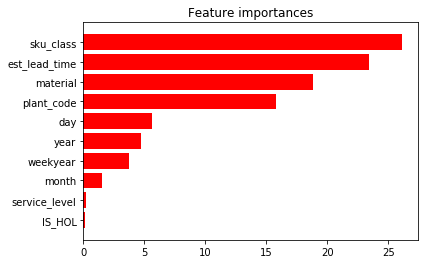

In [41]:
importances = cat2.feature_importances_
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(x_train.shape[1]), importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(x_train.shape[1]), [features[i] for i in indices])
plt.ylim([-1, x_train.shape[1]])
plt.show()

In [45]:
data.sku_class.describe()

count     191860
unique        11
top           AX
freq       65170
Name: sku_class, dtype: object

In [46]:
data.sku_class.value_counts()

AX              65170
BY              24663
BX              24352
AY              23315
AZ              15633
CY              14538
BZ              11990
CZ               7328
CX               4724
Discontinued       97
Out of scope       50
Name: sku_class, dtype: int64

In [57]:
data_AX = data[data.sku_class=='AX']
data_BY = data[data.sku_class=='BY']
data_BX = data[data.sku_class=='BX']
data_AY = data[data.sku_class=='AY']
data_AZ = data[data.sku_class=='AZ']
data_CY = data[data.sku_class=='CY']
data_BZ = data[data.sku_class=='BZ']
data_CZ = data[data.sku_class=='CZ']
data_CX = data[data.sku_class=='CX']

In [61]:
data_AY.describe()

,cases,value,f_day,adbno,service_level,est_lead_time,IS_HOL,month,year,log_cases,weekyear
count,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000
mean,110.236715,1919.706588,249.441132,7.914261,0.947949,60.179841,0.031010,6.217199,2017.641733,2.567245,25.297448
std,565.483685,4735.816152,127.543461,19.196732,0.007673,21.193859,0.173349,3.607835,0.638893,1.748246,15.667278
min,1.000000,-2301.550000,2.000000,2.000000,0.900000,16.000000,0.000000,1.000000,2016.000000,0.000000,1.000000
25%,4.000000,343.500000,181.000000,2.000000,0.950000,36.000000,0.000000,3.000000,2017.000000,1.386294,10.000000
50%,11.000000,755.400000,248.000000,3.000000,0.950000,69.000000,0.000000,6.000000,2018.000000,2.397895,25.000000
75%,36.000000,1848.740000,320.000000,4.000000,0.950000,71.000000,0.000000,9.000000,2018.000000,3.583519,39.000000
max,16822.000000,173352.500000,502.000000,584.000000,0.950000,120.000000,1.000000,12.000000,2019.000000,9.730443,52.000000


In [66]:
features_sku = ['material', 'plant_code', 'service_level', 'est_lead_time', 'IS_HOL', 'day', 'month', 'year', 'weekyear']
categorical_features_sku = ['material', 'plant_code', 'day', 'month', 'year', 'weekyear']

In [63]:
counter += 1
def cat_training(counter, sku):
    train_data_ + sku = data[(data.value >= 1) & (cata.sku_class == sku)]
    train_data_ + sku = train_data[np.abs(zscore(train_data.cases.apply(lambda x: np.log(x + 1))) < 3)]
    x_train_ + sku, x_val_ + sku, y_train_ + sku, y_val_ + sku = train_test_split(train_data_ + sku[features_sku], train_data + sku.cases.apply(lambda x: np.log(x+1)))
    cat_ + counter = CatBoostRegressor()
    cat2.fit(x_train, y_train, cat_features=categorical_features_sku)
    y_pred = cat2.predict(x_val)
    mean_squared_error(y_val, y_pred)
    mean_squared_error(f(y_val), f(y_pred))

SyntaxError: can't assign to operator (<ipython-input-63-d45d051e1966>, line 3)

In [67]:
train_data = data[(data.value >= 1) & (data.sku_class == 'BY')]
train_data = train_data[np.abs(zscore(train_data.cases.apply(lambda x: np.log(x + 1))) < 3)]
x_train, x_val, y_train, y_val = train_test_split(train_data[features_sku], train_data.cases.apply(lambda x: np.log(x+1)))
cat3 = CatBoostRegressor()
cat3.fit(x_train, y_train, cat_features=categorical_features_sku)
y_pred = cat3.predict(x_val)
print("MSE of log: {}".format(mean_squared_error(y_val, y_pred)))
print("MSE of not log: {}".format(mean_squared_error(f(y_val), f(y_pred))))

0:	learn: 2.6484883	total: 282ms	remaining: 4m 41s
1:	learn: 2.5891711	total: 441ms	remaining: 3m 39s
2:	learn: 2.5319672	total: 745ms	remaining: 4m 7s
3:	learn: 2.4772123	total: 990ms	remaining: 4m 6s
4:	learn: 2.4243822	total: 1.24s	remaining: 4m 6s
5:	learn: 2.3736777	total: 1.29s	remaining: 3m 34s
6:	learn: 2.3249741	total: 1.44s	remaining: 3m 23s
7:	learn: 2.2782351	total: 1.48s	remaining: 3m 3s
8:	learn: 2.2333612	total: 1.5s	remaining: 2m 44s
9:	learn: 2.1902749	total: 1.63s	remaining: 2m 41s
10:	learn: 2.1485993	total: 1.73s	remaining: 2m 35s
11:	learn: 2.1089770	total: 1.78s	remaining: 2m 26s
12:	learn: 2.0707577	total: 1.88s	remaining: 2m 22s
13:	learn: 2.0343371	total: 1.94s	remaining: 2m 16s
14:	learn: 1.9994098	total: 2.03s	remaining: 2m 13s
15:	learn: 1.9659044	total: 2.32s	remaining: 2m 22s
16:	learn: 1.9340013	total: 2.62s	remaining: 2m 31s
17:	learn: 1.9034908	total: 2.74s	remaining: 2m 29s
18:	learn: 1.8741684	total: 3.22s	remaining: 2m 46s
19:	learn: 1.8460608	total:

159:	learn: 1.2304934	total: 34.9s	remaining: 3m 3s
160:	learn: 1.2304280	total: 35s	remaining: 3m 2s
161:	learn: 1.2301712	total: 35s	remaining: 3m 1s
162:	learn: 1.2298808	total: 35.1s	remaining: 3m
163:	learn: 1.2296214	total: 35.1s	remaining: 2m 58s
164:	learn: 1.2295291	total: 35.1s	remaining: 2m 57s
165:	learn: 1.2294530	total: 35.2s	remaining: 2m 56s
166:	learn: 1.2293025	total: 35.3s	remaining: 2m 55s
167:	learn: 1.2291222	total: 35.3s	remaining: 2m 54s
168:	learn: 1.2287646	total: 35.4s	remaining: 2m 53s
169:	learn: 1.2286902	total: 35.4s	remaining: 2m 52s
170:	learn: 1.2285218	total: 35.5s	remaining: 2m 51s
171:	learn: 1.2284114	total: 35.5s	remaining: 2m 50s
172:	learn: 1.2282470	total: 35.6s	remaining: 2m 49s
173:	learn: 1.2279527	total: 35.6s	remaining: 2m 49s
174:	learn: 1.2278499	total: 35.6s	remaining: 2m 48s
175:	learn: 1.2275899	total: 35.7s	remaining: 2m 47s
176:	learn: 1.2274197	total: 35.7s	remaining: 2m 46s
177:	learn: 1.2272411	total: 35.8s	remaining: 2m 45s
178:

317:	learn: 1.2164372	total: 41.4s	remaining: 1m 28s
318:	learn: 1.2163707	total: 41.5s	remaining: 1m 28s
319:	learn: 1.2163567	total: 41.5s	remaining: 1m 28s
320:	learn: 1.2162058	total: 41.6s	remaining: 1m 27s
321:	learn: 1.2161364	total: 41.6s	remaining: 1m 27s
322:	learn: 1.2161364	total: 41.6s	remaining: 1m 27s
323:	learn: 1.2161297	total: 41.7s	remaining: 1m 26s
324:	learn: 1.2160587	total: 41.8s	remaining: 1m 26s
325:	learn: 1.2159890	total: 41.8s	remaining: 1m 26s
326:	learn: 1.2159872	total: 41.8s	remaining: 1m 26s
327:	learn: 1.2159595	total: 41.9s	remaining: 1m 25s
328:	learn: 1.2159543	total: 41.9s	remaining: 1m 25s
329:	learn: 1.2159215	total: 41.9s	remaining: 1m 25s
330:	learn: 1.2157796	total: 42s	remaining: 1m 24s
331:	learn: 1.2157578	total: 42s	remaining: 1m 24s
332:	learn: 1.2157003	total: 42.1s	remaining: 1m 24s
333:	learn: 1.2156753	total: 42.1s	remaining: 1m 23s
334:	learn: 1.2154915	total: 42.1s	remaining: 1m 23s
335:	learn: 1.2154793	total: 42.2s	remaining: 1m 2

479:	learn: 1.2080422	total: 48.6s	remaining: 52.6s
480:	learn: 1.2080361	total: 48.6s	remaining: 52.5s
481:	learn: 1.2080292	total: 48.7s	remaining: 52.3s
482:	learn: 1.2080064	total: 48.7s	remaining: 52.1s
483:	learn: 1.2079999	total: 48.8s	remaining: 52s
484:	learn: 1.2079603	total: 48.8s	remaining: 51.8s
485:	learn: 1.2079064	total: 48.9s	remaining: 51.7s
486:	learn: 1.2079040	total: 48.9s	remaining: 51.5s
487:	learn: 1.2078702	total: 48.9s	remaining: 51.4s
488:	learn: 1.2078102	total: 49s	remaining: 51.2s
489:	learn: 1.2078029	total: 49s	remaining: 51s
490:	learn: 1.2077361	total: 49.1s	remaining: 50.9s
491:	learn: 1.2077010	total: 49.1s	remaining: 50.7s
492:	learn: 1.2076968	total: 49.2s	remaining: 50.6s
493:	learn: 1.2076922	total: 49.2s	remaining: 50.4s
494:	learn: 1.2076852	total: 49.2s	remaining: 50.2s
495:	learn: 1.2075763	total: 49.3s	remaining: 50.1s
496:	learn: 1.2075428	total: 49.3s	remaining: 49.9s
497:	learn: 1.2074989	total: 49.4s	remaining: 49.8s
498:	learn: 1.207494

643:	learn: 1.2016136	total: 55.6s	remaining: 30.7s
644:	learn: 1.2016110	total: 55.6s	remaining: 30.6s
645:	learn: 1.2016055	total: 55.7s	remaining: 30.5s
646:	learn: 1.2015928	total: 55.7s	remaining: 30.4s
647:	learn: 1.2015543	total: 55.8s	remaining: 30.3s
648:	learn: 1.2014975	total: 55.8s	remaining: 30.2s
649:	learn: 1.2014788	total: 55.9s	remaining: 30.1s
650:	learn: 1.2014784	total: 55.9s	remaining: 30s
651:	learn: 1.2014296	total: 56s	remaining: 29.9s
652:	learn: 1.2014028	total: 56s	remaining: 29.8s
653:	learn: 1.2013465	total: 56s	remaining: 29.6s
654:	learn: 1.2013422	total: 56.1s	remaining: 29.5s
655:	learn: 1.2013266	total: 56.1s	remaining: 29.4s
656:	learn: 1.2013263	total: 56.2s	remaining: 29.3s
657:	learn: 1.2012513	total: 56.2s	remaining: 29.2s
658:	learn: 1.2012368	total: 56.2s	remaining: 29.1s
659:	learn: 1.2012090	total: 56.3s	remaining: 29s
660:	learn: 1.2011924	total: 56.3s	remaining: 28.9s
661:	learn: 1.2011885	total: 56.4s	remaining: 28.8s
662:	learn: 1.2011613	

807:	learn: 1.1972978	total: 1m 3s	remaining: 15.1s
808:	learn: 1.1972310	total: 1m 3s	remaining: 15s
809:	learn: 1.1972027	total: 1m 3s	remaining: 14.9s
810:	learn: 1.1971553	total: 1m 3s	remaining: 14.8s
811:	learn: 1.1971531	total: 1m 3s	remaining: 14.7s
812:	learn: 1.1971507	total: 1m 3s	remaining: 14.6s
813:	learn: 1.1970503	total: 1m 3s	remaining: 14.6s
814:	learn: 1.1970481	total: 1m 3s	remaining: 14.5s
815:	learn: 1.1969938	total: 1m 3s	remaining: 14.4s
816:	learn: 1.1969808	total: 1m 3s	remaining: 14.3s
817:	learn: 1.1969693	total: 1m 3s	remaining: 14.2s
818:	learn: 1.1969677	total: 1m 3s	remaining: 14.1s
819:	learn: 1.1969416	total: 1m 4s	remaining: 14.1s
820:	learn: 1.1968685	total: 1m 4s	remaining: 14s
821:	learn: 1.1968622	total: 1m 4s	remaining: 13.9s
822:	learn: 1.1968570	total: 1m 4s	remaining: 13.8s
823:	learn: 1.1967757	total: 1m 4s	remaining: 13.7s
824:	learn: 1.1967673	total: 1m 4s	remaining: 13.6s
825:	learn: 1.1967540	total: 1m 4s	remaining: 13.5s
826:	learn: 1.19

968:	learn: 1.1937245	total: 1m 10s	remaining: 2.25s
969:	learn: 1.1937234	total: 1m 10s	remaining: 2.18s
970:	learn: 1.1937214	total: 1m 10s	remaining: 2.1s
971:	learn: 1.1937050	total: 1m 10s	remaining: 2.03s
972:	learn: 1.1936734	total: 1m 10s	remaining: 1.96s
973:	learn: 1.1935762	total: 1m 10s	remaining: 1.88s
974:	learn: 1.1935755	total: 1m 10s	remaining: 1.81s
975:	learn: 1.1935712	total: 1m 10s	remaining: 1.74s
976:	learn: 1.1935461	total: 1m 10s	remaining: 1.66s
977:	learn: 1.1935444	total: 1m 10s	remaining: 1.59s
978:	learn: 1.1935386	total: 1m 10s	remaining: 1.52s
979:	learn: 1.1935352	total: 1m 10s	remaining: 1.45s
980:	learn: 1.1935021	total: 1m 10s	remaining: 1.37s
981:	learn: 1.1935010	total: 1m 10s	remaining: 1.3s
982:	learn: 1.1934917	total: 1m 10s	remaining: 1.23s
983:	learn: 1.1934573	total: 1m 10s	remaining: 1.15s
984:	learn: 1.1934571	total: 1m 11s	remaining: 1.08s
985:	learn: 1.1934372	total: 1m 11s	remaining: 1.01s
986:	learn: 1.1934204	total: 1m 11s	remaining: 9

In [68]:
train_data.describe()

,cases,value,f_day,adbno,service_level,est_lead_time,IS_HOL,month,year,log_cases,weekyear
count,24350.000000,24350.000000,24350.000000,24350.000000,24350.000000,24350.000000,24350.000000,24350.000000,24350.000000,24350.000000,24350.000000
mean,32.471170,1304.490848,220.156016,5.878193,0.947885,63.066940,0.030226,6.191253,2017.618480,2.151930,25.185832
std,80.667475,2325.495579,107.251084,8.350801,0.008018,18.777729,0.171212,3.570672,0.632783,1.510959,15.518344
min,1.000000,1.910000,3.000000,2.000000,0.900000,16.000000,0.000000,1.000000,2016.000000,0.000000,1.000000
25%,3.000000,258.180000,142.000000,3.000000,0.950000,66.000000,0.000000,3.000000,2017.000000,1.098612,10.000000
50%,7.000000,623.630000,220.000000,4.000000,0.950000,69.000000,0.000000,6.000000,2018.000000,1.945910,25.000000
75%,22.000000,1419.990000,292.000000,6.000000,0.950000,71.000000,0.000000,9.000000,2018.000000,3.091042,39.000000
max,760.000000,100809.800000,423.000000,238.000000,0.950000,120.000000,1.000000,12.000000,2019.000000,6.633318,52.000000


In [82]:
dic = {'y_val':f(y_val), 'y_pred':f(y_pred)}
df_verification = pd.DataFrame(dic)
df_verification['error'] = abs(f(y_val) - f(y_pred))
df_verification

,y_val,y_pred,error
84462,99.0,12.405210,86.594790
81079,25.0,7.908268,17.091732
34313,7.0,17.113482,10.113482
21513,8.0,8.318720,0.318720
74591,4.0,4.842033,0.842033
163938,5.0,10.577644,5.577644
76148,2.0,6.295910,4.295910
138338,5.0,3.954720,1.045280
135938,30.0,7.542972,22.457028
79198,2.0,2.507082,0.507082


In [84]:
sorted_verification = df_verification.sort_values(['error'], ascending=False)
sorted_verification

,y_val,y_pred,error
86324,759.0,8.640997,750.359003
146932,756.0,6.555265,749.444735
146919,753.0,7.423432,745.576568
146785,757.0,11.643391,745.356609
146721,757.0,13.364453,743.635547
86329,752.0,8.472810,743.527190
86313,752.0,8.705010,743.294990
39386,755.0,12.512638,742.487362
35699,750.0,8.038619,741.961381
35643,751.0,9.540704,741.459296


In [ ]:
train_data = data[(data.value >= 1) & (data.sku_class == 'AX')]
train_data = train_data[np.abs(zscore(train_data.cases.apply(lambda x: np.log(x + 1))) < 3)]
x_train, x_val, y_train, y_val = train_test_split(train_data[features_sku], train_data.cases.apply(lambda x: np.log(x+1)))
cat3 = CatBoostRegressor()
cat3.fit(x_train, y_train, cat_features=categorical_features_sku)
y_pred = cat3.predict(x_val)
print("MSE of log: {}".format(mean_squared_error(y_val, y_pred)))
print("MSE of not log: {}".format(mean_squared_error(f(y_val), f(y_pred))))

# Exploratory Data Analysis

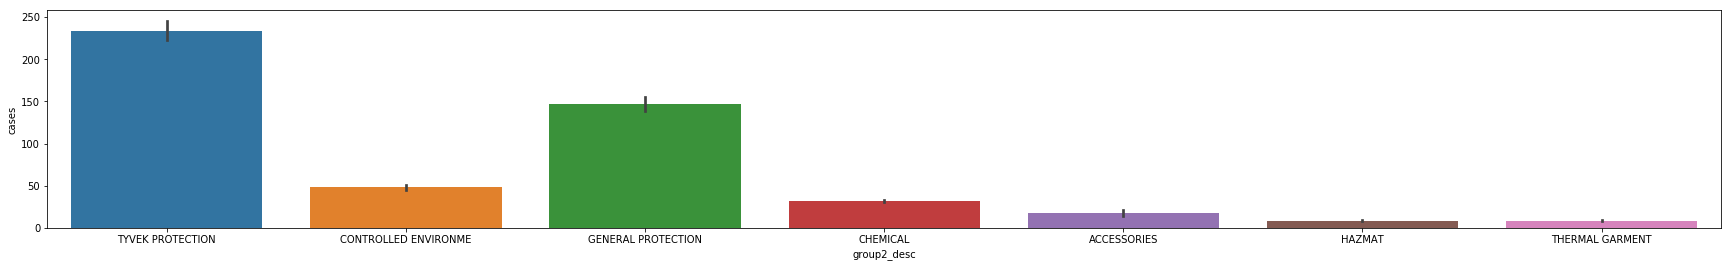

In [12]:
# Plotting Demand per Item Family
fig, (axis1) = plt.subplots(1,1,figsize=(30,4))
sns.barplot(x='group2_desc', y='cases', data=data, ax=axis1)

## The above plot shows the demand of products per material family. The average cases ranges somewhere between 0 to 50 with the maximum for the TYVEK PROTECTION and GENERAL PROTECTION item family.¶


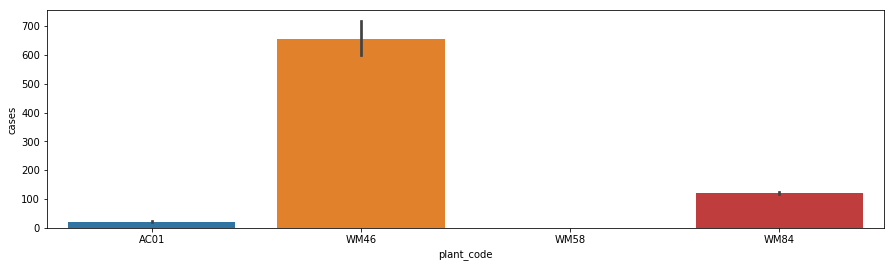

In [13]:
# Plotting Demand per Warehouse
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.barplot(x='plant_code', y='cases', data=data, ax=axis1)

## The bar plot of Total Cases per Warehouse shows that plant WM46 has the maximum demand over other warehouses.¶

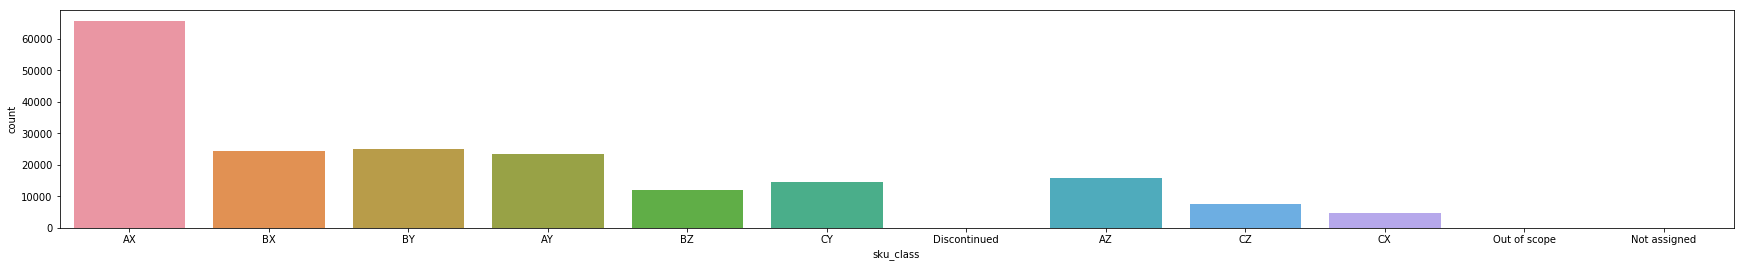

In [17]:
# Plotting SKU's per Sku Class
fig, (axis1) = plt.subplots(1,1,figsize=(30,4))
sns.countplot(x='sku_class', data=data, ax=axis1)

## The bar plot of Total Cases per SKU classes shows that Class AX has the maximum demand over other class.¶

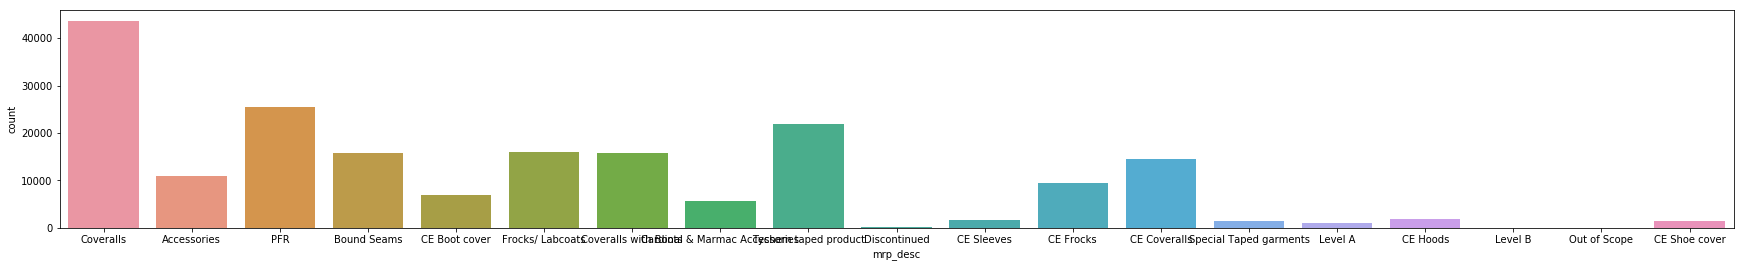

In [19]:
# Plotting SKU's per Sku Class
fig, (axis1) = plt.subplots(1,1,figsize=(30,4))
sns.countplot(x='mrp_desc', data=data, ax=axis1)

# Data Transformation

## One Hot Encoding

In [71]:
data.head()

In [183]:
## One hot encoding using get_dummies on pandas dataframe.
dummy_variables = ['mrp_desc','group2_desc','group3_desc','sku_class','plant_code','material','month','day','group6_desc']

for var in dummy_variables:
    dummy = pd.get_dummies(data_test[var], prefix = var, drop_first = False)
    data_test = pd.concat([data_test, dummy], axis = 1)

data_test = data_test.drop(dummy_variables, axis = 1)

In [162]:
data.head()

## The above dataframe contains data after the one hot encoding technique is applied to the data.

In [ ]:
## Subset on one Material

In [184]:
data_test = data_test.drop(['product_description'], axis = 1)

In [185]:
data_test = data_test.drop(['sales_date'], axis = 1)

In [186]:
data_test = data_test.drop(['year'], axis = 1)

In [188]:
data_test.head()

In [202]:
#train database without demand_cases
data_test = data_test.reset_index(drop=True)  #we reset the index
y = data_test['log_cases']
X = data_test.drop(['log_cases','cases'], axis = 1)

print('Shape X :', X.shape)
print('Shape y :', y.shape)

Shape X : (2086, 37)
Shape y : (2086,)


In [203]:
num_test = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=15)
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (1460, 37)
y_train shape : (1460,)
X_test shape : (626, 37)
y_test shape : (626,)


# Regression Model fitting techniques

## Linear Regression

In [231]:
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print(results)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [232]:
# Print the coefficients
print (results.intercept_, results.coef_)

-1.2254858327712608 [ 2.11390904e-05  6.45640479e-03  7.28698869e-02  8.09962364e-04
  3.36454581e-02  9.27255466e-02  4.85722573e-16  7.40648810e-01
 -7.40648810e-01 -2.70616862e-16  4.16333634e-17  0.00000000e+00
 -2.69987455e-02 -2.63517174e-02  5.33504629e-02  3.40918760e-01
  3.99730051e-01 -7.40648810e-01  2.92659609e-01  2.32818667e-01
  8.29481267e-02  1.01444245e-01 -1.53163265e-02 -6.81543063e-02
 -6.57234081e-02 -1.78981604e-01 -1.29075451e-01  3.80999706e-02
 -2.63456120e-02 -2.64373910e-01  2.02798533e-02 -1.23379074e-01
 -2.95958274e-01 -1.67126216e-01  4.06901128e-01  1.59282583e-01
  0.00000000e+00]


In [244]:
import statsmodels.api as sm
import statsmodels.formula.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()

In [234]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_cases   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     239.6
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:31:15   Log-Likelihood:                -2161.1
No. Observations:                1460   AIC:                             4372.
Df Residuals:                    1435   BIC:                             4504.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
value                          2.114e-05   1.26e-06     16.763      0.000    1.87e-05    2.36e-05
f_day                             0.0065      0.003      2.004      0.045       0.000       0.013
adbno                             0.0729      0.015      4.932      0.000       0.044       0.102
service_level                    -0.1377      0.116     -1.183      0.237      -0.366       0.091
est_lead_time                     0.0318      0.003     11.858      0.000       0.027       0.037
IS_HOL                            0.0927      0.160      0.581      0.561      -0.220       0.406
group6_desc_Finished Goods       -0.1505      0.111     -1.355      0.176      -0.368       0.067
mrp_desc_Coveralls                0.6546      0.174      3.764      0.000       0.313       0.996
mrp_desc_Coveralls with Boots    -0.8052      0.067    -12.002      0.000      -0.937      -0.674
group2_desc_TYVEK PROTECTION     -0.1505      0.111     -1.355      0.176      -0.368       0.067
group3_desc_TYVEK PROTECTION     -0.1505      0.111     -1.355      0.176      -0.368       0.067
sku_class_AX                     -0.1505      0.111     -1.355      0.176      -0.368       0.067
plant_code_AC01                  -0.1763      0.369     -0.478      0.633      -0.900       0.547
plant_code_WM46                   0.0212      0.512      0.041      0.967      -0.984       1.026
plant_code_WM84                   0.0046      0.991      0.005      0.996      -1.939       1.948
material_D13384914                0.2979      0.110      2.704      0.007       0.082       0.514
material_D13397959                0.3567      0.076      4.704      0.000       0.208       0.506
material_D13398000               -0.8052      0.067    -12.002      0.000      -0.937      -0.674
month_1                           0.2801      0.084      3.318      0.001       0.115       0.446
month_2                           0.2203      0.085      2.592      0.010       0.054       0.387
month_3                           0.0704      0.093      0.753      0.451      -0.113       0.254
month_4                           0.0889      0.109      0.812      0.417      -0.126       0.304
month_5                          -0.0279      0.092     -0.301      0.763      -0.209       0.154
month_6                          -0.0807      0.101     -0.800      0.424      -0.279       0.117
month_7                          -0.0783      0.102     -0.769      0.442      -0.278       0.121
month_8                          -0.1915      0.089     -2.161      0.031      -0.365      -0.018
month_9                          -0.1416      0.101     -1.399      0.162      -0.340       0.057
month_10                          0.0256      0.092      0.276      0.782      -0.156       0.207
month_11                         -0.0389     

## The Linear regression model gives a R- square value of 0.80¶

## Regularization

In [105]:
# We perform regularization in order to alter the loss function to penalize it for having higher coefficients for each feature variable. And as we know, large coefficients leads to overfitting.

In [208]:
ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
ridge.score(X_test,y_test)

0.7866884696537426

## DecisionTree Regressor

In [209]:
dtr=DecisionTreeRegressor(max_depth=10,min_samples_leaf=5,max_leaf_nodes=5)

In [210]:
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

##using a decision tree greatly improves the accurancy of model prediction.

R2 score =  0.8193877073331604 / 1.0
MSE score =  1.0458227171801846 / 0.0


## ExtraTreesRegressor

In [211]:
etr = ExtraTreesRegressor()

# Choose some parameter combinations to try

parameters = {'n_estimators': [5,10,100],
              'criterion': ['mse'],
              'max_depth': [5,10,15], 
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5]
             }
#We have to use RandomForestRegressor's own scorer (which is R^2 score)

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold

grid_obj = GridSearchCV(etr, parameters,
                        cv=3, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
etr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
etr.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    5.4s finished


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=10,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=5,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [212]:
y_pred = etr.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.8858113862804373 / 1.0
MSE score =  0.661201098263658 / 0.0


## Random Forest Regressor

In [213]:
# Choose the type of classifier. 
RFR = RandomForestRegressor()

# Choose some parameter combinations to try
parameters = {'n_estimators': [5, 10, 100],
              'min_samples_leaf': [1,5]
             }


#We have to use RandomForestRegressor's own scorer (which is R^2 score)

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [214]:
y_pred = RFR.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.8789902750271389 / 1.0
MSE score =  0.7006982609416811 / 0.0


In [215]:
RFR = RandomForestRegressor()

# Choose some parameter combinations to try
parameters = {'n_estimators': [5,10,100],
              'criterion': ['mse'],
              'max_depth': [5,10,15], 
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5]
             }


#We have to use RandomForestRegressor's own scorer (which is R^2 score)

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    7.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [216]:
y_pred = RFR.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.8863023346291564 / 1.0
MSE score =  0.6583582965447313 / 0.0


## Gradient Boosting Regressor¶

In [217]:
#gbr = GradientBoostingRegressor(loss='huber',learning_rate=0.3,n_estimators=100,max_depth=5,min_samples_split=3)
gbr=GradientBoostingRegressor()

parameters = {'n_estimators': [5,10],
              'loss':['huber'],
              'criterion': ['mse'],
              'max_depth': [5,10], 
              'min_samples_split': [2,5],
              'min_samples_leaf': [1,5]
             }

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(gbr, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gbr.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.7s finished


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=10,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [218]:
y_pred = gbr.predict(X_test)

print('R2 score using Gradient Boosting= ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using Gradient Boosting= ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score using Gradient Boosting=  0.770121315580939 / 1.0
MSE score using Gradient Boosting=  1.3310962770646908 / 0.0


In [ ]:
y_pred = RFR.predict(X_test)

print('R2 score using Gradient Boosting= ',r2_score(y_test, y_pred), '/ 1.0')

In [219]:
gbr = GradientBoostingRegressor(loss='ls',learning_rate=0.1,n_estimators=150,max_depth=10,min_samples_split=5)


parameters = {'n_estimators': [5,15,150],
              'loss':['ls','huber'],
              'criterion': ['mse'],
              'max_depth': [10,15], 
              'min_samples_split': [2,5],
              'min_samples_leaf': [1,5]
             }

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(gbr, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gbr.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   55.5s finished


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=5,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [220]:
y_pred = RFR.predict(X_test)

print('R2 score using Gradient Boosting= ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using Gradient Boosting= ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score using Gradient Boosting=  0.8863023346291564 / 1.0
MSE score using Gradient Boosting=  0.6583582965447313 / 0.0


## Neural Network

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function by training on a dataset, where is the number of dimensions for input and is the number of dimensions for output.

The advantages of Multi-layer Perceptron are:

-- Capability to learn non-linear models.

-- Capability to learn models in real-time (on-line learning) using partial_fit.

In [230]:
# Convert data as np.array
features = np.array(X_train)
#targets = np.array(y_train.reshape(y_train.shape[0],1))
targets = np.array(y_train.values.reshape(y_train.shape[0],1))
features_validation= np.array(X_test)
#targets_validation = np.array(y_test.reshape(y_test.shape[0],1))
targets_validation = np.array(y_test.values.reshape(y_test.shape[0],1))

print(features[:10])
print(targets[:10])

[[1.451846e+04 5.610000e+02 2.000000e+00 9.500000e-01 6.800000e+01
  0.000000e+00 1.000000e+00 1.000000e+00 0.000000e+00 1.000000e+00
  1.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
  1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00]
 [3.063776e+04 5.610000e+02 2.000000e+00 9.500000e-01 6.800000e+01
  0.000000e+00 1.000000e+00 1.000000e+00 0.000000e+00 1.000000e+00
  1.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
  1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00]
 [1.

In [222]:
# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse']) #mse: mean_square_error
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                1216      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


Step :  0 / 1000
1460/1460 [==============================] - 0s 44us/step
Training MSE: 26.82664616205921
626/626 [==============================] - 0s 29us/step
Validation MSE: 26.10839982078479 

Step :  250 / 1000
1460/1460 [==============================] - 0s 23us/step
Training MSE: 15.933697933040254
626/626 [==============================] - 0s 25us/step
Validation MSE: 15.475590407277068 

Step :  500 / 1000
1460/1460 [==============================] - 0s 28us/step
Training MSE: 6.6471697781183945
626/626 [==============================] - 0s 22us/step
Validation MSE: 6.601346415071823 

Step :  750 / 1000
1460/1460 [==============================] - 0s 19us/step
Training MSE: 5.66271744558256
626/626 [==============================] - 0s 23us/step
Validation MSE: 5.791889003290536 



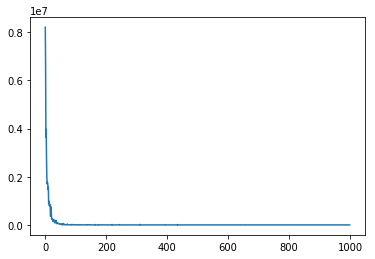

In [223]:
# Training the model
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
hist =np.array([])

for i in range(epochs_ratio):
    history = model.fit(features, targets, epochs=epochs_step, batch_size=100, verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(features, targets)
    print("Training MSE:", score[1])
    score = model.evaluate(features_validation, targets_validation)
    print("Validation MSE:", score[1], "\n")
    hist = np.concatenate((hist, np.array(history.history['mean_squared_error'])), axis = 0)
    
# plot metrics
plt.plot(hist)
plt.show()

In [224]:
y_pred = model.predict(features_validation, verbose=0)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  -0.0002520774713306029 / 1.0
MSE score =  5.791888968796933 / 0.0


/ds_data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


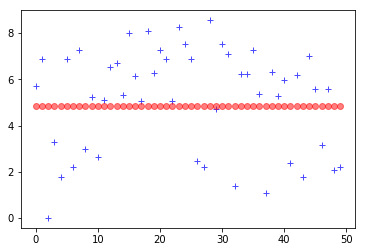

In [225]:
#Lets plot the  first 50 predictions
plt.plot(y_test.as_matrix()[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.show()